In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# download from https://evictionlab.org/get-the-data/
# Choose VA => choose "all.csv" (Change the file name to 'VA.csv')
df = pd.read_csv('VA_block-groups.csv')

In [3]:
df.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed', 'low-flag'],
      dtype='object')

In [4]:
df.shape

(90624, 27)

In [5]:
df['parent-location'].unique().shape

(139,)

In [6]:
df_crime = pd.read_csv('VA_CrimeRate.csv')
# only has data from 2000-2005, 1980,1985,1990,1995

In [7]:
df_crime.columns

Index(['Unnamed: 0', 'AggravatedAssault', 'Burglary', 'County', 'LarcenyTheft',
       'Murder-Man-slaughter', 'Population3', 'Population4', 'Rape', 'Robbery',
       'TotalPropertyCrime', 'TotalViolentCrime', 'VehicleTheft', 'Year3',
       'Year4'],
      dtype='object')

In [8]:
df_crime.head()

,Unnamed: 0,AggravatedAssault,Burglary,County,LarcenyTheft,Murder-Man-slaughter,Population3,Population4,Rape,Robbery,TotalPropertyCrime,TotalViolentCrime,VehicleTheft,Year3,Year4
0,0,110.5,282.4,Accomack County,917.8,6.1,"32,577","32,577",15.3,43.0,"1,347.6",175.0,147.3,2005,2005
1,1,68.4,220.7,Accomack County,"1,063.3",3.1,"32,165","32,165",34.2,59.1,"1,405.3",164.8,121.2,2004,2004
2,2,71.4,276.4,Accomack County,875.8,3.1,"32,199","32,199",37.3,62.1,"1,292.0",173.9,139.8,2003,2003
3,3,137.2,405.3,Accomack County,788.7,0.0,"32,077","32,077",21.8,106.0,"1,318.7",265.0,124.7,2002,2002
4,4,88.6,572.6,Accomack County,974.4,6.3,"31,609","31,609",25.3,129.7,"1,698.9",249.9,151.9,2001,2001


In [9]:
def string_to_float(string):
    return float(string.replace(",",""))

def string_to_int(string):
    return int(string.replace(",",""))

In [10]:
# df_crime['total_property_crime'] = df_crime['TotalPropertyCrime'].apply(string_to_float)
# df_crime['total_violent_crime'] = df_crime['TotalViolentCrime'].apply(string_to_float)
# df_crime['population'] = df_crime['Population4'].apply(string_to_int)

In [11]:
df_crime['TotalPropertyCrime'] = df_crime['TotalPropertyCrime'].apply(string_to_float)
df_crime['TotalViolentCrime'] = df_crime['TotalViolentCrime'].apply(string_to_float)
df_crime['LarcenyTheft'] = df_crime['LarcenyTheft'].apply(string_to_float)
df_crime['population'] = df_crime['Population4'].apply(string_to_int)

In [13]:
df_crime.head()

,Unnamed: 0,AggravatedAssault,Burglary,County,LarcenyTheft,Murder-Man-slaughter,Population3,Population4,Rape,Robbery,TotalPropertyCrime,TotalViolentCrime,VehicleTheft,Year3,Year4,population
0,0,110.5,282.4,Accomack County,917.8,6.1,"32,577","32,577",15.3,43.0,1347.6,175.0,147.3,2005,2005,32577
1,1,68.4,220.7,Accomack County,1063.3,3.1,"32,165","32,165",34.2,59.1,1405.3,164.8,121.2,2004,2004,32165
2,2,71.4,276.4,Accomack County,875.8,3.1,"32,199","32,199",37.3,62.1,1292.0,173.9,139.8,2003,2003,32199
3,3,137.2,405.3,Accomack County,788.7,0.0,"32,077","32,077",21.8,106.0,1318.7,265.0,124.7,2002,2002,32077
4,4,88.6,572.6,Accomack County,974.4,6.3,"31,609","31,609",25.3,129.7,1698.9,249.9,151.9,2001,2001,31609


In [15]:
type(df_crime['TotalPropertyCrime'][0])
type(df_crime['LarcenyTheft'][0])

numpy.float64

In [16]:
df_geo = pd.read_csv('VA_blockgroups_GEOID_Lon_Lat.csv')

In [17]:
df_geo.columns

Index(['Unnamed: 0', 'GEOID', 'east', 'north', 'south', 'west', 'lon', 'lat'], dtype='object')

In [18]:
df_geo.head()

,Unnamed: 0,GEOID,east,north,south,west,lon,lat
0,0,510131031001,-77.0700,38.8597,38.8475,-77.0907,-77.08035,38.85360
1,1,510131031002,-77.0761,38.8517,38.8437,-77.0896,-77.08285,38.84770
2,2,510131031003,-77.0875,38.8527,38.8447,-77.0952,-77.09135,38.84870
3,3,510131032001,-77.0772,38.8650,38.8624,-77.0818,-77.07950,38.86370
4,4,510131032002,-77.0769,38.8639,38.8590,-77.0841,-77.08050,38.86145


In [19]:
df_geo.shape

(5330, 8)

In [20]:
df_unemployment=pd.read_csv('VA_Unemployment.csv')

In [21]:
df_unemployment.columns

Index(['County', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [22]:
df_unemployment.head()

,County,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Accomack County,3.0,3.4,4.2,4.4,4.7,4.7,4.3,4.1,5.0,6.5,7.9,8.4,7.9,7.2,6.7,5.4,4.9,4.8
1,Albemarle County,1.7,2.2,3.1,3.4,3.1,2.9,2.5,2.2,3.0,5.1,6.0,5.6,5.2,4.8,4.5,3.9,3.6,3.3
2,Alexandria City,1.8,2.7,3.4,3.0,2.8,2.6,2.2,2.2,2.8,4.8,4.9,4.5,4.1,4.1,3.9,3.3,2.9,2.9
3,Alleghany County,3.1,4.2,5.3,4.6,4.8,4.7,4.9,4.4,5.4,9.1,8.6,7.9,7.1,6.6,5.9,5.1,5.1,4.9
4,Amelia County,2.0,2.6,3.9,3.9,3.6,3.5,3.0,2.8,4.5,7.7,8.5,7.5,6.5,5.9,5.3,4.5,4.3,4.0


In [23]:
df_unemployment.shape

(133, 19)

In [24]:
df_geo['GEOID'].unique().shape

(5330,)

In [25]:
df2 = pd.merge(df,df_geo[['GEOID', 'lon', 'lat']],on='GEOID')

In [26]:
df2.shape

(90560, 29)

In [27]:
df.shape

(90624, 27)

In [28]:
df2.head()

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,imputed,subbed,low-flag,lon,lat
0,510010901001,2000,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,103.0,3.0,3.0,2.91,2.91,0,0,0,-75.3609,37.9635
1,510010901001,2001,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,102.0,1.0,1.0,0.98,0.98,0,0,0,-75.3609,37.9635
2,510010901001,2002,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,102.0,3.0,3.0,2.95,2.95,0,0,0,-75.3609,37.9635
3,510010901001,2003,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,101.0,3.0,3.0,2.96,2.96,0,0,0,-75.3609,37.9635
4,510010901001,2004,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,101.0,0.0,0.0,0.00,0.00,0,0,0,-75.3609,37.9635


In [29]:
def assignCounty(parentstr):
    return parentstr.strip(', Virginia').title()

In [30]:
df2['County'] = df2['parent-location'].apply(assignCounty)

In [31]:
df2.head()

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,eviction-filings,evictions,eviction-rate,eviction-filing-rate,imputed,subbed,low-flag,lon,lat,County
0,510010901001,2000,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,3.0,2.91,2.91,0,0,0,-75.3609,37.9635,Accomack County
1,510010901001,2001,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,1.0,1.0,0.98,0.98,0,0,0,-75.3609,37.9635,Accomack County
2,510010901001,2002,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,3.0,2.95,2.95,0,0,0,-75.3609,37.9635,Accomack County
3,510010901001,2003,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,3.0,2.96,2.96,0,0,0,-75.3609,37.9635,Accomack County
4,510010901001,2004,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,0.0,0.0,0.00,0.00,0,0,0,-75.3609,37.9635,Accomack County


In [32]:
def assignUnemploy(row):
    county = row['County']
    year = row['year']
    Y = str(year)
    try:
        result = float(df_unemployment[(df_unemployment['County']==county)][Y])
    except:
        result = np.nan
    return result

In [33]:
df_unemployment.head()

,County,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Accomack County,3.0,3.4,4.2,4.4,4.7,4.7,4.3,4.1,5.0,6.5,7.9,8.4,7.9,7.2,6.7,5.4,4.9,4.8
1,Albemarle County,1.7,2.2,3.1,3.4,3.1,2.9,2.5,2.2,3.0,5.1,6.0,5.6,5.2,4.8,4.5,3.9,3.6,3.3
2,Alexandria City,1.8,2.7,3.4,3.0,2.8,2.6,2.2,2.2,2.8,4.8,4.9,4.5,4.1,4.1,3.9,3.3,2.9,2.9
3,Alleghany County,3.1,4.2,5.3,4.6,4.8,4.7,4.9,4.4,5.4,9.1,8.6,7.9,7.1,6.6,5.9,5.1,5.1,4.9
4,Amelia County,2.0,2.6,3.9,3.9,3.6,3.5,3.0,2.8,4.5,7.7,8.5,7.5,6.5,5.9,5.3,4.5,4.3,4.0


In [34]:
df2['unemployment_rate']=df2.apply(assignUnemploy,axis=1)

In [35]:
df2

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,evictions,eviction-rate,eviction-filing-rate,imputed,subbed,low-flag,lon,lat,County,unemployment_rate
0,510010901001,2000,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,2.91,2.91,0,0,0,-75.36090,37.96350,Accomack County,3.0
1,510010901001,2001,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,1.0,0.98,0.98,0,0,0,-75.36090,37.96350,Accomack County,3.4
2,510010901001,2002,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,2.95,2.95,0,0,0,-75.36090,37.96350,Accomack County,4.2
3,510010901001,2003,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,2.96,2.96,0,0,0,-75.36090,37.96350,Accomack County,4.4
4,510010901001,2004,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,0.0,0.00,0.00,0,0,0,-75.36090,37.96350,Accomack County,4.7
5,510010901001,2005,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.50,35013.59,223919.40,...,0.0,0.00,0.00,0,0,0,-75.36090,37.96350,Accomack County,4.7
6,510010901001,2006,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.50,35013.59,223919.40,...,4.0,4.02,4.02,0,0,0,-75.36090,37.96350,Accomack County,4.3
7,510010901001,2007,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.50,35013.59,223919.40,...,3.0,3.04,4.05,0,0,0,-75.36090,37.96350,Accomack County,4.1
8,510010901001,2008,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.50,35013.59,223919.40,...,2.0,2.04,2.04,0,0,0,-75.36090,37.96350,Accomack County,5.0
9,510010901001,2009,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.50,35013.59,223919.40,...,2.0,2.05,2.05,0,0,0,-75.36090,37.96350,Accomack County,6.5


In [36]:
df_unemployment.head()

,County,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Accomack County,3.0,3.4,4.2,4.4,4.7,4.7,4.3,4.1,5.0,6.5,7.9,8.4,7.9,7.2,6.7,5.4,4.9,4.8
1,Albemarle County,1.7,2.2,3.1,3.4,3.1,2.9,2.5,2.2,3.0,5.1,6.0,5.6,5.2,4.8,4.5,3.9,3.6,3.3
2,Alexandria City,1.8,2.7,3.4,3.0,2.8,2.6,2.2,2.2,2.8,4.8,4.9,4.5,4.1,4.1,3.9,3.3,2.9,2.9
3,Alleghany County,3.1,4.2,5.3,4.6,4.8,4.7,4.9,4.4,5.4,9.1,8.6,7.9,7.1,6.6,5.9,5.1,5.1,4.9
4,Amelia County,2.0,2.6,3.9,3.9,3.6,3.5,3.0,2.8,4.5,7.7,8.5,7.5,6.5,5.9,5.3,4.5,4.3,4.0


In [37]:
df_unemployment[df_unemployment['County']=='Winchester City']

,County,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
129,Winchester City,2.2,3.2,4.0,3.7,3.3,3.1,2.9,3.2,4.5,8.1,8.3,7.4,6.7,5.8,5.1,4.4,4.0,3.6


In [38]:
df_crime.columns

Index(['Unnamed: 0', 'AggravatedAssault', 'Burglary', 'County', 'LarcenyTheft',
       'Murder-Man-slaughter', 'Population3', 'Population4', 'Rape', 'Robbery',
       'TotalPropertyCrime', 'TotalViolentCrime', 'VehicleTheft', 'Year3',
       'Year4', 'population'],
      dtype='object')

In [39]:
df_crime['year'] = df_crime['Year3'] 

In [40]:
df_crime.head()

,Unnamed: 0,AggravatedAssault,Burglary,County,LarcenyTheft,Murder-Man-slaughter,Population3,Population4,Rape,Robbery,TotalPropertyCrime,TotalViolentCrime,VehicleTheft,Year3,Year4,population,year
0,0,110.5,282.4,Accomack County,917.8,6.1,"32,577","32,577",15.3,43.0,1347.6,175.0,147.3,2005,2005,32577,2005
1,1,68.4,220.7,Accomack County,1063.3,3.1,"32,165","32,165",34.2,59.1,1405.3,164.8,121.2,2004,2004,32165,2004
2,2,71.4,276.4,Accomack County,875.8,3.1,"32,199","32,199",37.3,62.1,1292.0,173.9,139.8,2003,2003,32199,2003
3,3,137.2,405.3,Accomack County,788.7,0.0,"32,077","32,077",21.8,106.0,1318.7,265.0,124.7,2002,2002,32077,2002
4,4,88.6,572.6,Accomack County,974.4,6.3,"31,609","31,609",25.3,129.7,1698.9,249.9,151.9,2001,2001,31609,2001


In [41]:
df_to2005_all = pd.merge(df2,df_crime[['County','year','AggravatedAssault', 'Burglary', 'LarcenyTheft','Murder-Man-slaughter',
                            'Rape','Robbery','VehicleTheft','TotalPropertyCrime','TotalViolentCrime']],on=['year','County'])

In [43]:
df_to2005_all.head()

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,unemployment_rate,AggravatedAssault,Burglary,LarcenyTheft,Murder-Man-slaughter,Rape,Robbery,VehicleTheft,TotalPropertyCrime,TotalViolentCrime
0,510010901001,2000,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,128.5,510.8,1223.9,3.2,25.7,99.6,221.7,1956.3,257.0
1,510010901002,2000,901.2,"Accomack County, Virginia",1030.00,12.43,25.20,492.00,27750.00,86900.00,...,3.0,128.5,510.8,1223.9,3.2,25.7,99.6,221.7,1956.3,257.0
2,510010901003,2000,901.3,"Accomack County, Virginia",1022.93,15.20,20.29,630.33,27851.19,115025.01,...,3.0,128.5,510.8,1223.9,3.2,25.7,99.6,221.7,1956.3,257.0
3,510010901004,2000,901.4,"Accomack County, Virginia",1208.15,18.97,18.06,556.13,24821.68,89268.69,...,3.0,128.5,510.8,1223.9,3.2,25.7,99.6,221.7,1956.3,257.0
4,510010902001,2000,902.1,"Accomack County, Virginia",1000.00,37.87,31.62,386.54,28736.24,71750.40,...,3.0,128.5,510.8,1223.9,3.2,25.7,99.6,221.7,1956.3,257.0


In [44]:
df_to2005_all.shape

(21246, 40)

In [45]:
df_to2005_all.to_csv('VA_blocks_to2005_evi_geo_unemploy_crime.csv')

In [46]:
df2.to_csv('VA_blocks_evi_geo_unemploy.csv')

# Note about data:
df_to2005_all: have eviction from the blocks groups from 2000-2005, combined with GEOID (lon,lat), unployment rate, crime rates
df2: have eviction from the blocks groups from all year, combined with GEOID (lon,lat), unployment rate (no crime rates)

# Fit with random forest

In [47]:
df_clean = df_to2005_all.dropna(axis=0, how='any')
df_clean = df_clean[df_clean['eviction-rate']<100]

In [48]:
df_clean.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed', 'low-flag', 'lon', 'lat',
       'County', 'unemployment_rate', 'AggravatedAssault', 'Burglary',
       'LarcenyTheft', 'Murder-Man-slaughter', 'Rape', 'Robbery',
       'VehicleTheft', 'TotalPropertyCrime', 'TotalViolentCrime'],
      dtype='object')

In [54]:
df_clean.shape

(18241, 40)

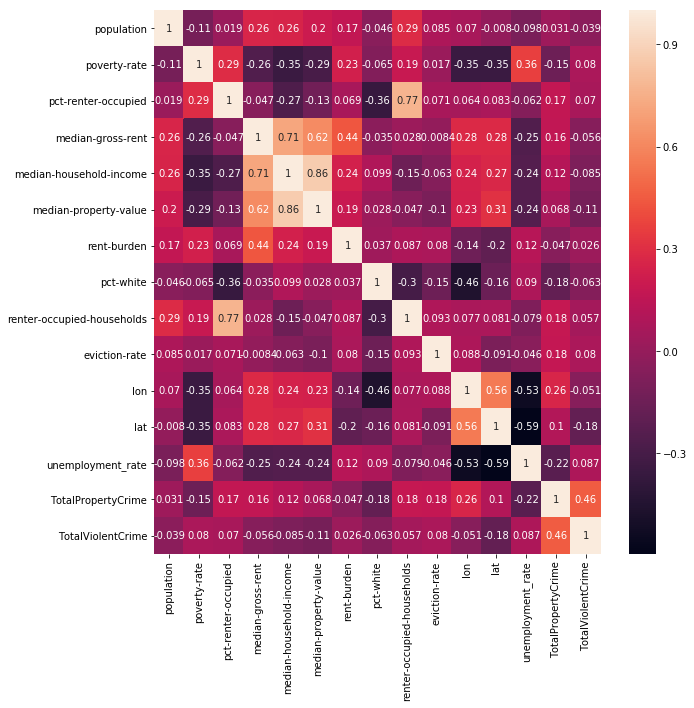

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df_clean.drop(['GEOID','name','parent-location','imputed','subbed','year','AggravatedAssault', 'Burglary', 'LarcenyTheft','Murder-Man-slaughter',
                             'Rape','Robbery','VehicleTheft','pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi', 'pct-multiple', 'pct-other', 'low-flag',
                          'eviction-filing-rate','evictions','eviction-filing-rate','eviction-filings'],axis=1).corr(),annot=True)

# In 2000-2004

In [67]:
df_county=df_clean[(df_clean['year'] == 2000) | (df_clean['year'] == 2001) | (df_clean['year'] == 2002) |
                     (df_clean['year'] == 2003) | (df_clean['year'] == 2004)]

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


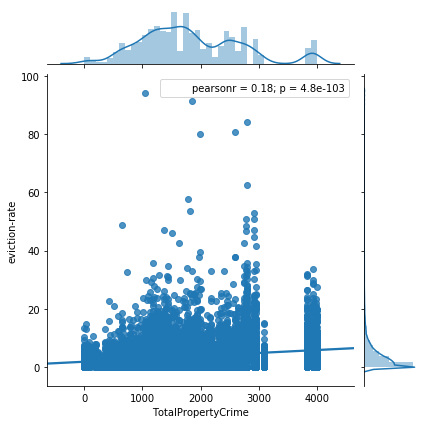

In [68]:
sns.jointplot(x='TotalPropertyCrime',y='eviction-rate',data=df_county,kind='reg')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


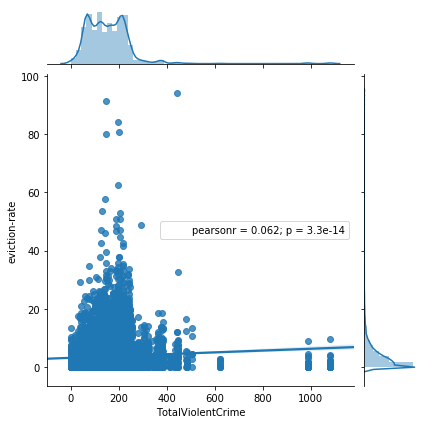

In [69]:
sns.jointplot(x='TotalViolentCrime',y='eviction-rate',data=df_county,kind='reg')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


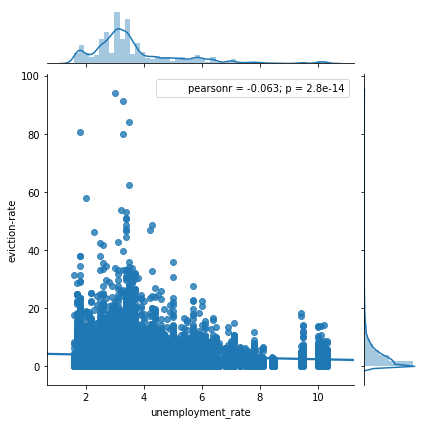

In [70]:
sns.jointplot(x='unemployment_rate',y='eviction-rate',data=df_county,kind='reg')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


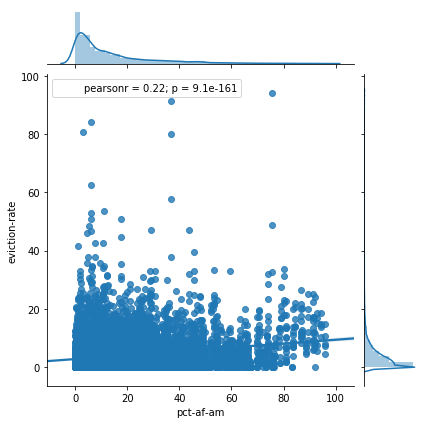

In [71]:
sns.jointplot(x='pct-af-am',y='eviction-rate',data=df_county,kind='reg')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


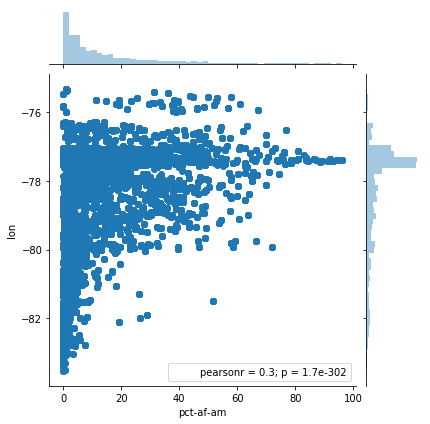

In [75]:
sns.jointplot(x='pct-af-am',y='lon',data=df_county,kind='scatter')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


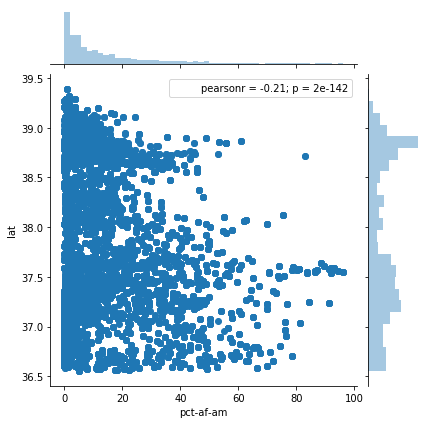

In [74]:
sns.jointplot(x='pct-af-am',y='lat',data=df_county,kind='scatter')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


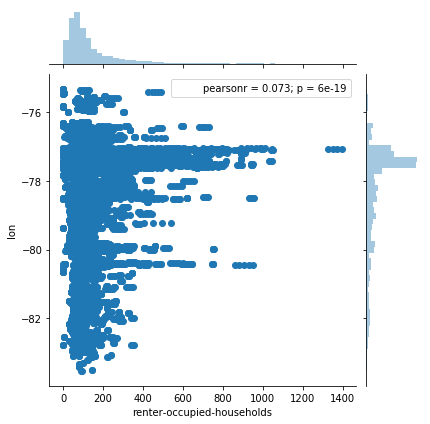

In [76]:
sns.jointplot(x='renter-occupied-households',y='lon',data=df_county,kind='scatter')

In [59]:
df_clean.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed', 'low-flag', 'lon', 'lat',
       'County', 'unemployment_rate', 'AggravatedAssault', 'Burglary',
       'LarcenyTheft', 'Murder-Man-slaughter', 'Rape', 'Robbery',
       'VehicleTheft', 'TotalPropertyCrime', 'TotalViolentCrime'],
      dtype='object')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


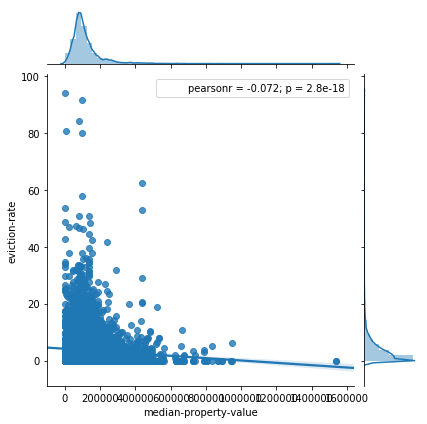

In [77]:
sns.jointplot(x='median-property-value',y='eviction-rate',data=df_county,kind='reg')

# Random Forest Analysis- With crime rate (2000-2004)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import model_selection

In [81]:
df_county.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed', 'low-flag', 'lon', 'lat',
       'County', 'unemployment_rate', 'AggravatedAssault', 'Burglary',
       'LarcenyTheft', 'Murder-Man-slaughter', 'Rape', 'Robbery',
       'VehicleTheft', 'TotalPropertyCrime', 'TotalViolentCrime'],
      dtype='object')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


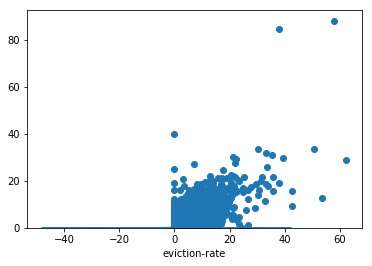

In [126]:
X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi', 'pct-multiple', 'pct-other','population','year',
                   'AggravatedAssault', 'Burglary', 'LarcenyTheft','Murder-Man-slaughter','Rape','Robbery','VehicleTheft','low-flag','County'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=10)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);


Training set score: 0.8942687438
Test set score: 0.4250678626
MAE: 2.3560949796472186
MSE: 13.653085827227498
RMSE: 3.6950082310094383
Feature ranking:
1. feature 8 (lat) (0.148930)
2. feature 7 (lon) (0.114063)
3. feature 10 (TotalPropertyCrime) (0.106441)
4. feature 6 (pct-white) (0.095530)
5. feature 1 (pct-renter-occupied) (0.092677)
6. feature 0 (poverty-rate) (0.075520)
7. feature 2 (median-gross-rent) (0.074398)
8. feature 11 (TotalViolentCrime) (0.063591)
9. feature 9 (unemployment_rate) (0.061889)
10. feature 4 (median-property-value) (0.059249)
11. feature 5 (rent-burden) (0.056150)
12. feature 3 (median-household-income) (0.051562)


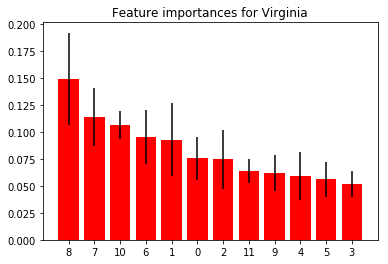

In [127]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [128]:
X_train.shape

(10316, 12)

In [130]:
y_train

7734      0.00
13816     1.97
10896     0.00
1529      0.91
15929     8.60
4488      4.17
16326     3.64
16786     0.65
11897     9.54
10791     4.59
20482     2.42
8097      3.18
17250     6.73
18711     0.81
18015     3.45
16406     6.92
9393      3.46
4506      4.30
3494      3.99
17721     2.10
15460     0.00
4157      3.32
13769     0.79
11423     3.12
204       0.00
7394      1.30
18283     3.21
1268      0.00
8138      5.07
21048     8.37
         ...  
2543      0.00
7695      0.00
15910     2.70
15132     2.94
19003     1.83
20498     0.00
49        0.87
20787     1.20
7801      3.56
14375     3.04
11389     3.50
4118      0.65
9772      0.00
19151     0.00
10556     0.00
17925     4.50
8262      2.62
3394     10.30
9712      1.57
9606      7.89
1317      3.10
5345      6.86
18334     5.50
10182     1.48
717       3.78
9629      5.05
12396     6.34
1707      7.38
1893      0.00
19282     2.69
Name: eviction-rate, Length: 10316, dtype: float64

In [92]:
est = RandomForestRegressor()
gs = model_selection.GridSearchCV(
    est,
    {"n_estimators": range(10,100)},
    cv=3,  # 5-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_mean_squared_error'
)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'n_estimators': 97}


In [93]:
gs.score(X_test, y_test)

-11.944368823913459

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


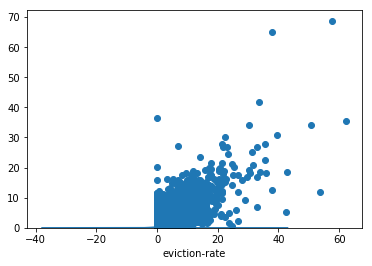

In [94]:
predictions = gs.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);

In [95]:
print("Training set score: %.10f" % gs.score(X_train, y_train))
print("Test set score: %.10f" % gs.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: -1.8047990597
Test set score: -11.9443688239
MAE: 2.2313394834636564
MSE: 11.944368823913459
RMSE: 3.4560626186331547


In [98]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(10, 200, 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(5,40, 2)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
pprint(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#create shuffelled cv
cv = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = cv, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_final_depth = rf_random.best_params_['max_depth']
rf_final_n_est = rf_random.best_params_['n_estimators']
print(rf_final_depth)
print(rf_final_n_est)

{'max_depth': [5,
               7,
               9,
               11,
               13,
               15,
               17,
               19,
               21,
               23,
               25,
               27,
               29,
               31,
               33,
               35,
               37,
               39],
 'n_estimators': [10,
                  20,
                  30,
                  40,
                  50,
                  60,
                  70,
                  80,
                  90,
                  100,
                  110,
                  120,
                  130,
                  140,
                  150,
                  160,
                  170,
                  180,
                  190]}
Fitting 20 folds for each of 100 candidates, totalling 2000 fits
[CV] n_estimators=100, max_depth=29 ..................................
[CV] n_estimators=100, max_depth=29 ..................................
[CV] n_estimators=100, m

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.7s


[CV] .................... n_estimators=30, max_depth=17, total=   2.4s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] ................... n_estimators=100, max_depth=29, total=   9.2s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] ................... n_estimators=100, max_depth=29, total=   9.3s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] ................... n_estimators=100, max_depth=29, total=   9.4s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] ................... n_estimators=100, max_depth=29, total=   9.4s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] .................... n_estimators=30, max_depth=17, total=   2.4s
[CV] n_estimators=190, max_depth=15 ..................................
[CV] .................... n_estimators=30, max_depth=17, total=   2.4s
[CV] .................... n_estimators=30, max_depth=17, total=   2.4s
[CV] n

[CV] ................... n_estimators=130, max_depth=17, total=  10.5s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  10.4s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  10.7s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  10.4s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  10.5s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  10.5s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  10.5s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] .

[CV] ................... n_estimators=120, max_depth=23, total=  11.1s
[CV] n_estimators=90, max_depth=23 ...................................
[CV] .................... n_estimators=90, max_depth=23, total=   8.1s
[CV] n_estimators=90, max_depth=23 ...................................
[CV] .................... n_estimators=90, max_depth=23, total=   8.2s
[CV] n_estimators=90, max_depth=23 ...................................
[CV] .................... n_estimators=90, max_depth=23, total=   8.2s
[CV] n_estimators=90, max_depth=23 ...................................


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min


[CV] .................... n_estimators=90, max_depth=23, total=   8.1s
[CV] n_estimators=90, max_depth=23 ...................................
[CV] .................... n_estimators=90, max_depth=23, total=   8.2s
[CV] .................... n_estimators=90, max_depth=23, total=   8.1s
[CV] n_estimators=90, max_depth=23 ...................................
[CV] n_estimators=90, max_depth=23 ...................................
[CV] .................... n_estimators=90, max_depth=23, total=   8.1s
[CV] n_estimators=90, max_depth=23 ...................................
[CV] .................... n_estimators=90, max_depth=23, total=   8.3s
[CV] n_estimators=90, max_depth=23 ...................................
[CV] .................... n_estimators=90, max_depth=23, total=   8.2s
[CV] n_estimators=170, max_depth=39 ..................................
[CV] .................... n_estimators=90, max_depth=23, total=   8.2s
[CV] .................... n_estimators=90, max_depth=23, total=   8.2s
[CV] n

[CV] ................... n_estimators=110, max_depth=17, total=   8.9s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=   8.9s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=   8.8s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=   8.9s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=   8.8s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=   8.8s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=   8.9s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] .

[CV] ................... n_estimators=110, max_depth=35, total=  10.5s
[CV] n_estimators=30, max_depth=33 ...................................
[CV] .................... n_estimators=30, max_depth=33, total=   2.8s
[CV] n_estimators=30, max_depth=33 ...................................
[CV] .................... n_estimators=30, max_depth=33, total=   2.9s
[CV] n_estimators=30, max_depth=33 ...................................
[CV] .................... n_estimators=30, max_depth=33, total=   2.8s
[CV] n_estimators=30, max_depth=33 ...................................
[CV] .................... n_estimators=30, max_depth=33, total=   2.9s
[CV] n_estimators=30, max_depth=33 ...................................
[CV] .................... n_estimators=30, max_depth=33, total=   2.9s
[CV] n_estimators=30, max_depth=33 ...................................
[CV] .................... n_estimators=30, max_depth=33, total=   2.8s
[CV] n_estimators=30, max_depth=33 ...................................
[CV] .

[CV] ................... n_estimators=150, max_depth=15, total=  11.3s
[CV] n_estimators=50, max_depth=17 ...................................
[CV] ................... n_estimators=150, max_depth=15, total=  11.3s
[CV] n_estimators=50, max_depth=17 ...................................
[CV] ................... n_estimators=150, max_depth=15, total=  11.3s
[CV] n_estimators=50, max_depth=17 ...................................
[CV] .................... n_estimators=50, max_depth=17, total=   4.0s
[CV] n_estimators=50, max_depth=17 ...................................
[CV] .................... n_estimators=50, max_depth=17, total=   4.1s
[CV] n_estimators=50, max_depth=17 ...................................
[CV] .................... n_estimators=50, max_depth=17, total=   4.1s
[CV] n_estimators=50, max_depth=17 ...................................
[CV] .................... n_estimators=50, max_depth=17, total=   4.0s
[CV] n_estimators=50, max_depth=17 ...................................
[CV] .

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.3min


[CV] ................... n_estimators=150, max_depth=19, total=  12.8s
[CV] n_estimators=150, max_depth=19 ..................................
[CV] ................... n_estimators=150, max_depth=19, total=  13.0s
[CV] n_estimators=150, max_depth=19 ..................................
[CV] ................... n_estimators=150, max_depth=19, total=  12.9s
[CV] n_estimators=150, max_depth=19 ..................................
[CV] ................... n_estimators=150, max_depth=19, total=  12.8s
[CV] n_estimators=60, max_depth=21 ...................................
[CV] ................... n_estimators=150, max_depth=19, total=  12.8s
[CV] n_estimators=60, max_depth=21 ...................................
[CV] ................... n_estimators=150, max_depth=19, total=  12.8s
[CV] n_estimators=60, max_depth=21 ...................................
[CV] ................... n_estimators=150, max_depth=19, total=  12.8s
[CV] n_estimators=60, max_depth=21 ...................................
[CV] .

[CV] ................... n_estimators=140, max_depth=25, total=  12.8s
[CV] n_estimators=140, max_depth=25 ..................................
[CV] ................... n_estimators=140, max_depth=25, total=  12.9s
[CV] n_estimators=140, max_depth=25 ..................................
[CV] ................... n_estimators=140, max_depth=25, total=  12.9s
[CV] n_estimators=140, max_depth=25 ..................................
[CV] ................... n_estimators=140, max_depth=25, total=  12.8s
[CV] n_estimators=140, max_depth=25 ..................................
[CV] ................... n_estimators=140, max_depth=25, total=  12.9s
[CV] n_estimators=140, max_depth=25 ..................................
[CV] ................... n_estimators=140, max_depth=25, total=  12.9s
[CV] n_estimators=180, max_depth=9 ...................................
[CV] ................... n_estimators=140, max_depth=25, total=  13.0s
[CV] n_estimators=180, max_depth=9 ...................................
[CV] .

[CV] .................... n_estimators=60, max_depth=17, total=   4.9s
[CV] n_estimators=60, max_depth=17 ...................................
[CV] .................... n_estimators=60, max_depth=17, total=   4.8s
[CV] n_estimators=60, max_depth=17 ...................................
[CV] .................... n_estimators=60, max_depth=17, total=   4.8s
[CV] n_estimators=60, max_depth=17 ...................................
[CV] ................... n_estimators=190, max_depth=35, total=  17.9s
[CV] n_estimators=60, max_depth=17 ...................................
[CV] ................... n_estimators=190, max_depth=35, total=  17.7s
[CV] n_estimators=60, max_depth=17 ...................................
[CV] ................... n_estimators=190, max_depth=35, total=  17.9s
[CV] n_estimators=60, max_depth=17 ...................................
[CV] ................... n_estimators=190, max_depth=35, total=  17.8s
[CV] n_estimators=60, max_depth=17 ...................................
[CV] .

[CV] ................... n_estimators=140, max_depth=15, total=  10.4s
[CV] n_estimators=140, max_depth=15 ..................................
[CV] ................... n_estimators=140, max_depth=15, total=  10.6s
[CV] n_estimators=140, max_depth=15 ..................................
[CV] ................... n_estimators=140, max_depth=15, total=  10.5s
[CV] n_estimators=140, max_depth=15 ..................................
[CV] ................... n_estimators=140, max_depth=15, total=  10.6s
[CV] n_estimators=140, max_depth=15 ..................................
[CV] ................... n_estimators=140, max_depth=15, total=  10.6s
[CV] n_estimators=140, max_depth=15 ..................................
[CV] ................... n_estimators=140, max_depth=15, total=  10.6s
[CV] n_estimators=140, max_depth=15 ..................................
[CV] ................... n_estimators=140, max_depth=15, total=  10.5s
[CV] n_estimators=140, max_depth=15 ..................................
[CV] .

[CV] ................... n_estimators=130, max_depth=37, total=  12.2s
[CV] n_estimators=130, max_depth=37 ..................................
[CV] ................... n_estimators=130, max_depth=37, total=  12.4s
[CV] n_estimators=130, max_depth=37 ..................................
[CV] ................... n_estimators=130, max_depth=37, total=  12.2s
[CV] n_estimators=130, max_depth=37 ..................................
[CV] ................... n_estimators=130, max_depth=37, total=  12.1s
[CV] n_estimators=130, max_depth=37 ..................................
[CV] ................... n_estimators=130, max_depth=37, total=  12.3s
[CV] n_estimators=130, max_depth=37 ..................................
[CV] ................... n_estimators=130, max_depth=37, total=  12.2s
[CV] n_estimators=130, max_depth=37 ..................................
[CV] ................... n_estimators=130, max_depth=37, total=  12.1s
[CV] n_estimators=130, max_depth=37 ..................................
[CV] .

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 11.3min


[CV] n_estimators=100, max_depth=15 ..................................
[CV] ..................... n_estimators=20, max_depth=9, total=   1.1s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ..................... n_estimators=20, max_depth=9, total=   1.0s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ..................... n_estimators=20, max_depth=9, total=   1.0s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ..................... n_estimators=20, max_depth=9, total=   1.0s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ..................... n_estimators=20, max_depth=9, total=   1.1s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ..................... n_estimators=20, max_depth=9, total=   1.1s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ..................... n_estimators=20, max_depth=9, total=   1.0s
[CV] n

[CV] n_estimators=30, max_depth=13 ...................................
[CV] .................... n_estimators=30, max_depth=13, total=   2.1s
[CV] n_estimators=30, max_depth=13 ...................................
[CV] .................... n_estimators=30, max_depth=13, total=   2.1s
[CV] n_estimators=60, max_depth=5 ....................................
[CV] .................... n_estimators=30, max_depth=13, total=   2.0s
[CV] n_estimators=60, max_depth=5 ....................................
[CV] .................... n_estimators=30, max_depth=13, total=   2.1s
[CV] n_estimators=60, max_depth=5 ....................................
[CV] .................... n_estimators=30, max_depth=13, total=   2.1s
[CV] n_estimators=60, max_depth=5 ....................................
[CV] .................... n_estimators=30, max_depth=13, total=   2.1s
[CV] n_estimators=60, max_depth=5 ....................................
[CV] .................... n_estimators=30, max_depth=13, total=   2.0s
[CV] .

[CV] n_estimators=90, max_depth=39 ...................................
[CV] .................... n_estimators=90, max_depth=39, total=   8.5s
[CV] n_estimators=90, max_depth=39 ...................................
[CV] .................... n_estimators=90, max_depth=39, total=   8.4s
[CV] n_estimators=90, max_depth=39 ...................................
[CV] .................... n_estimators=90, max_depth=39, total=   8.4s
[CV] n_estimators=90, max_depth=39 ...................................
[CV] .................... n_estimators=90, max_depth=39, total=   8.4s
[CV] n_estimators=160, max_depth=15 ..................................
[CV] .................... n_estimators=90, max_depth=39, total=   8.5s
[CV] n_estimators=160, max_depth=15 ..................................
[CV] .................... n_estimators=90, max_depth=39, total=   8.7s
[CV] n_estimators=160, max_depth=15 ..................................
[CV] .................... n_estimators=90, max_depth=39, total=   8.4s
[CV] n

[CV] n_estimators=90, max_depth=13 ...................................
[CV] .................... n_estimators=90, max_depth=13, total=   6.2s
[CV] n_estimators=90, max_depth=13 ...................................
[CV] .................... n_estimators=90, max_depth=13, total=   6.2s
[CV] n_estimators=90, max_depth=13 ...................................
[CV] .................... n_estimators=90, max_depth=13, total=   6.1s
[CV] n_estimators=90, max_depth=13 ...................................
[CV] .................... n_estimators=90, max_depth=13, total=   6.2s
[CV] n_estimators=90, max_depth=13 ...................................
[CV] .................... n_estimators=90, max_depth=13, total=   6.2s
[CV] n_estimators=90, max_depth=13 ...................................
[CV] .................... n_estimators=90, max_depth=13, total=   6.2s
[CV] n_estimators=40, max_depth=5 ....................................
[CV] .................... n_estimators=90, max_depth=13, total=   6.1s
[CV] n

[CV] n_estimators=120, max_depth=31 ..................................
[CV] ................... n_estimators=120, max_depth=31, total=  11.3s
[CV] n_estimators=120, max_depth=31 ..................................
[CV] ................... n_estimators=120, max_depth=31, total=  11.3s
[CV] ................... n_estimators=120, max_depth=31, total=  11.1s
[CV] n_estimators=120, max_depth=31 ..................................
[CV] n_estimators=120, max_depth=31 ..................................
[CV] ................... n_estimators=120, max_depth=31, total=  11.2s
[CV] n_estimators=120, max_depth=31 ..................................
[CV] ................... n_estimators=120, max_depth=31, total=  11.2s
[CV] n_estimators=120, max_depth=31 ..................................
[CV] ................... n_estimators=120, max_depth=31, total=  11.2s
[CV] ................... n_estimators=120, max_depth=31, total=  11.3s
[CV] n_estimators=120, max_depth=31 ..................................
[CV] n

[CV] n_estimators=40, max_depth=35 ...................................
[CV] .................... n_estimators=50, max_depth=25, total=   4.6s
[CV] n_estimators=40, max_depth=35 ...................................
[CV] .................... n_estimators=40, max_depth=35, total=   3.8s
[CV] n_estimators=40, max_depth=35 ...................................
[CV] .................... n_estimators=40, max_depth=35, total=   3.8s
[CV] n_estimators=40, max_depth=35 ...................................
[CV] .................... n_estimators=40, max_depth=35, total=   3.8s
[CV] n_estimators=40, max_depth=35 ...................................
[CV] .................... n_estimators=40, max_depth=35, total=   3.8s
[CV] n_estimators=40, max_depth=35 ...................................
[CV] .................... n_estimators=40, max_depth=35, total=   3.7s
[CV] n_estimators=40, max_depth=35 ...................................
[CV] .................... n_estimators=40, max_depth=35, total=   3.7s
[CV] n

[CV] ................... n_estimators=170, max_depth=11, total=  10.2s
[CV] n_estimators=150, max_depth=7 ...................................
[CV] n_estimators=150, max_depth=7 ...................................
[CV] ................... n_estimators=170, max_depth=11, total=  10.2s
[CV] n_estimators=150, max_depth=7 ...................................
[CV] ................... n_estimators=170, max_depth=11, total=  10.2s
[CV] n_estimators=150, max_depth=7 ...................................
[CV] .................... n_estimators=150, max_depth=7, total=   6.2s
[CV] n_estimators=150, max_depth=7 ...................................
[CV] .................... n_estimators=150, max_depth=7, total=   6.2s
[CV] n_estimators=150, max_depth=7 ...................................
[CV] .................... n_estimators=150, max_depth=7, total=   6.2s
[CV] n_estimators=150, max_depth=7 ...................................
[CV] .................... n_estimators=150, max_depth=7, total=   6.2s
[CV] n

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 15.5min


[CV] .................... n_estimators=150, max_depth=7, total=   6.2s
[CV] n_estimators=60, max_depth=33 ...................................
[CV] .................... n_estimators=60, max_depth=33, total=   5.6s
[CV] n_estimators=60, max_depth=33 ...................................
[CV] .................... n_estimators=60, max_depth=33, total=   5.6s
[CV] n_estimators=60, max_depth=33 ...................................
[CV] .................... n_estimators=60, max_depth=33, total=   5.7s
[CV] .................... n_estimators=60, max_depth=33, total=   5.7s
[CV] n_estimators=60, max_depth=33 ...................................
[CV] n_estimators=60, max_depth=33 ...................................
[CV] .................... n_estimators=60, max_depth=33, total=   5.6s
[CV] n_estimators=60, max_depth=33 ...................................
[CV] .................... n_estimators=60, max_depth=33, total=   5.6s
[CV] .................... n_estimators=60, max_depth=33, total=   5.7s
[CV] n

[CV] n_estimators=70, max_depth=13 ...................................
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=60, max_depth=29, total=   5.6s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=60, max_depth=29, total=   5.6s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=   4.8s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=   4.8s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=   4.8s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=   4.8s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .

[CV] ................... n_estimators=100, max_depth=25, total=   9.1s
[CV] n_estimators=10, max_depth=11 ...................................
[CV] .................... n_estimators=10, max_depth=11, total=   0.6s
[CV] n_estimators=10, max_depth=11 ...................................
[CV] .................... n_estimators=10, max_depth=11, total=   0.6s
[CV] n_estimators=10, max_depth=11 ...................................
[CV] .................... n_estimators=10, max_depth=11, total=   0.6s
[CV] n_estimators=10, max_depth=11 ...................................
[CV] .................... n_estimators=10, max_depth=11, total=   0.6s
[CV] n_estimators=10, max_depth=11 ...................................
[CV] .................... n_estimators=10, max_depth=11, total=   0.6s
[CV] n_estimators=10, max_depth=11 ...................................
[CV] .................... n_estimators=10, max_depth=11, total=   0.6s
[CV] n_estimators=10, max_depth=11 ...................................
[CV] .

[CV] ................... n_estimators=120, max_depth=39, total=  11.2s
[CV] n_estimators=80, max_depth=9 ....................................
[CV] ................... n_estimators=120, max_depth=39, total=  11.4s
[CV] n_estimators=80, max_depth=9 ....................................
[CV] ................... n_estimators=120, max_depth=39, total=  11.2s
[CV] n_estimators=80, max_depth=9 ....................................
[CV] .................... n_estimators=20, max_depth=35, total=   1.9s
[CV] n_estimators=80, max_depth=9 ....................................
[CV] .................... n_estimators=20, max_depth=35, total=   1.9s
[CV] n_estimators=80, max_depth=9 ....................................
[CV] .................... n_estimators=20, max_depth=35, total=   1.9s
[CV] n_estimators=80, max_depth=9 ....................................
[CV] .................... n_estimators=20, max_depth=35, total=   1.9s
[CV] n_estimators=80, max_depth=9 ....................................
[CV] .

[CV] .................... n_estimators=40, max_depth=39, total=   3.8s
[CV] n_estimators=40, max_depth=39 ...................................
[CV] .................... n_estimators=40, max_depth=39, total=   3.8s
[CV] n_estimators=160, max_depth=37 ..................................
[CV] .................... n_estimators=40, max_depth=39, total=   3.9s
[CV] .................... n_estimators=40, max_depth=39, total=   3.9s
[CV] n_estimators=160, max_depth=37 ..................................
[CV] n_estimators=160, max_depth=37 ..................................
[CV] .................... n_estimators=40, max_depth=39, total=   3.8s
[CV] n_estimators=160, max_depth=37 ..................................
[CV] .................... n_estimators=40, max_depth=39, total=   3.8s
[CV] n_estimators=160, max_depth=37 ..................................
[CV] .................... n_estimators=40, max_depth=39, total=   3.8s
[CV] n_estimators=160, max_depth=37 ..................................
[CV] .

[CV] .................... n_estimators=30, max_depth=23, total=   2.7s
[CV] n_estimators=30, max_depth=23 ...................................
[CV] .................... n_estimators=30, max_depth=23, total=   2.8s
[CV] n_estimators=30, max_depth=23 ...................................
[CV] .................... n_estimators=30, max_depth=23, total=   2.7s
[CV] n_estimators=30, max_depth=23 ...................................
[CV] .................... n_estimators=30, max_depth=23, total=   2.8s
[CV] n_estimators=160, max_depth=11 ..................................
[CV] .................... n_estimators=30, max_depth=23, total=   2.8s
[CV] .................... n_estimators=30, max_depth=23, total=   2.7s
[CV] n_estimators=160, max_depth=11 ..................................
[CV] n_estimators=160, max_depth=11 ..................................
[CV] .................... n_estimators=30, max_depth=23, total=   2.7s
[CV] n_estimators=160, max_depth=11 ..................................
[CV] .

[CV] .................... n_estimators=170, max_depth=5, total=   5.2s
[CV] n_estimators=170, max_depth=5 ...................................
[CV] .................... n_estimators=170, max_depth=5, total=   5.2s
[CV] n_estimators=170, max_depth=5 ...................................
[CV] .................... n_estimators=170, max_depth=5, total=   5.3s
[CV] n_estimators=170, max_depth=5 ...................................
[CV] .................... n_estimators=170, max_depth=5, total=   5.3s
[CV] n_estimators=170, max_depth=5 ...................................
[CV] .................... n_estimators=170, max_depth=5, total=   5.4s
[CV] n_estimators=170, max_depth=5 ...................................
[CV] .................... n_estimators=170, max_depth=5, total=   5.2s
[CV] n_estimators=100, max_depth=11 ..................................
[CV] .................... n_estimators=170, max_depth=5, total=   5.2s
[CV] n_estimators=100, max_depth=11 ..................................
[CV] .

[CV] ..................... n_estimators=80, max_depth=5, total=   2.5s
[CV] n_estimators=80, max_depth=5 ....................................
[CV] ..................... n_estimators=80, max_depth=5, total=   2.5s
[CV] n_estimators=80, max_depth=5 ....................................
[CV] ..................... n_estimators=80, max_depth=5, total=   2.5s
[CV] n_estimators=80, max_depth=5 ....................................
[CV] ..................... n_estimators=80, max_depth=5, total=   2.5s
[CV] n_estimators=80, max_depth=5 ....................................
[CV] ..................... n_estimators=80, max_depth=5, total=   2.5s
[CV] n_estimators=80, max_depth=5 ....................................
[CV] ..................... n_estimators=80, max_depth=5, total=   2.5s
[CV] n_estimators=80, max_depth=5 ....................................
[CV] ..................... n_estimators=80, max_depth=5, total=   2.5s
[CV] n_estimators=80, max_depth=5 ....................................
[CV] .

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 21.1min


[CV] ................... n_estimators=100, max_depth=39, total=   9.4s
[CV] n_estimators=100, max_depth=39 ..................................
[CV] ................... n_estimators=100, max_depth=39, total=   9.6s
[CV] n_estimators=100, max_depth=39 ..................................
[CV] ................... n_estimators=100, max_depth=39, total=   9.4s
[CV] ................... n_estimators=100, max_depth=39, total=   9.5s
[CV] n_estimators=100, max_depth=39 ..................................
[CV] n_estimators=100, max_depth=39 ..................................
[CV] ................... n_estimators=100, max_depth=39, total=   9.4s
[CV] n_estimators=100, max_depth=39 ..................................
[CV] ................... n_estimators=100, max_depth=39, total=   9.3s
[CV] n_estimators=100, max_depth=39 ..................................
[CV] ................... n_estimators=100, max_depth=39, total=   9.3s
[CV] n_estimators=100, max_depth=39 ..................................
[CV] .

[CV] .................... n_estimators=20, max_depth=13, total=   1.4s
[CV] n_estimators=20, max_depth=13 ...................................
[CV] .................... n_estimators=20, max_depth=13, total=   1.4s
[CV] n_estimators=20, max_depth=13 ...................................
[CV] .................... n_estimators=20, max_depth=13, total=   1.4s
[CV] n_estimators=20, max_depth=13 ...................................
[CV] .................... n_estimators=20, max_depth=13, total=   1.4s
[CV] n_estimators=20, max_depth=13 ...................................
[CV] .................... n_estimators=20, max_depth=13, total=   1.4s
[CV] n_estimators=20, max_depth=13 ...................................
[CV] .................... n_estimators=20, max_depth=13, total=   1.4s
[CV] n_estimators=20, max_depth=13 ...................................
[CV] .................... n_estimators=20, max_depth=13, total=   1.4s
[CV] n_estimators=20, max_depth=13 ...................................
[CV] .

[CV] .................... n_estimators=30, max_depth=39, total=   2.8s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] ................... n_estimators=190, max_depth=37, total=  18.1s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] ................... n_estimators=190, max_depth=37, total=  17.9s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   2.9s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   2.8s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   2.8s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   2.8s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .

[CV] .................... n_estimators=70, max_depth=15, total=   5.3s
[CV] n_estimators=110, max_depth=29 ..................................
[CV] .................... n_estimators=70, max_depth=15, total=   5.3s
[CV] n_estimators=110, max_depth=29 ..................................
[CV] .................... n_estimators=70, max_depth=15, total=   5.2s
[CV] n_estimators=110, max_depth=29 ..................................
[CV] .................... n_estimators=70, max_depth=15, total=   5.3s
[CV] n_estimators=110, max_depth=29 ..................................
[CV] ................... n_estimators=110, max_depth=29, total=  10.4s
[CV] n_estimators=110, max_depth=29 ..................................
[CV] ................... n_estimators=110, max_depth=29, total=  10.3s
[CV] n_estimators=110, max_depth=29 ..................................
[CV] ................... n_estimators=110, max_depth=29, total=  10.3s
[CV] n_estimators=110, max_depth=29 ..................................
[CV] .

[CV] ................... n_estimators=170, max_depth=33, total=  15.8s
[CV] n_estimators=160, max_depth=19 ..................................
[CV] ................... n_estimators=170, max_depth=33, total=  16.1s
[CV] n_estimators=160, max_depth=19 ..................................
[CV] ................... n_estimators=170, max_depth=33, total=  15.6s
[CV] n_estimators=160, max_depth=19 ..................................
[CV] ................... n_estimators=170, max_depth=33, total=  15.9s
[CV] n_estimators=160, max_depth=19 ..................................
[CV] ................... n_estimators=170, max_depth=33, total=  15.8s
[CV] n_estimators=160, max_depth=19 ..................................
[CV] ................... n_estimators=170, max_depth=33, total=  16.4s
[CV] n_estimators=160, max_depth=19 ..................................
[CV] ................... n_estimators=160, max_depth=19, total=  13.6s
[CV] n_estimators=160, max_depth=19 ..................................
[CV] .

[CV] ..................... n_estimators=60, max_depth=7, total=   2.5s
[CV] ..................... n_estimators=60, max_depth=7, total=   2.5s
[CV] n_estimators=10, max_depth=39 ...................................
[CV] n_estimators=10, max_depth=39 ...................................
[CV] ..................... n_estimators=60, max_depth=7, total=   2.5s
[CV] n_estimators=10, max_depth=39 ...................................
[CV] .................... n_estimators=10, max_depth=39, total=   0.9s
[CV] n_estimators=10, max_depth=39 ...................................
[CV] .................... n_estimators=10, max_depth=39, total=   0.9s
[CV] n_estimators=10, max_depth=39 ...................................
[CV] ..................... n_estimators=60, max_depth=7, total=   2.5s
[CV] n_estimators=10, max_depth=39 ...................................
[CV] ..................... n_estimators=60, max_depth=7, total=   2.5s
[CV] n_estimators=10, max_depth=39 ...................................
[CV] .

[CV] ................... n_estimators=190, max_depth=25, total=  17.5s
[CV] n_estimators=190, max_depth=25 ..................................
[CV] ................... n_estimators=190, max_depth=25, total=  17.5s
[CV] n_estimators=190, max_depth=25 ..................................
[CV] ................... n_estimators=190, max_depth=25, total=  17.5s
[CV] n_estimators=70, max_depth=31 ...................................
[CV] ................... n_estimators=190, max_depth=25, total=  17.5s
[CV] n_estimators=70, max_depth=31 ...................................
[CV] ................... n_estimators=190, max_depth=25, total=  17.6s
[CV] n_estimators=70, max_depth=31 ...................................
[CV] ................... n_estimators=190, max_depth=25, total=  17.9s
[CV] n_estimators=70, max_depth=31 ...................................
[CV] .................... n_estimators=70, max_depth=31, total=   6.5s
[CV] n_estimators=70, max_depth=31 ...................................
[CV] .

[CV] ................... n_estimators=130, max_depth=29, total=  12.2s
[CV] n_estimators=130, max_depth=29 ..................................
[CV] ................... n_estimators=130, max_depth=29, total=  12.1s
[CV] n_estimators=130, max_depth=29 ..................................
[CV] ................... n_estimators=130, max_depth=29, total=  12.2s
[CV] n_estimators=130, max_depth=29 ..................................
[CV] ................... n_estimators=130, max_depth=29, total=  12.1s
[CV] n_estimators=130, max_depth=29 ..................................
[CV] ................... n_estimators=130, max_depth=29, total=  12.1s
[CV] n_estimators=40, max_depth=31 ...................................
[CV] ................... n_estimators=130, max_depth=29, total=  12.2s
[CV] n_estimators=40, max_depth=31 ...................................
[CV] ................... n_estimators=130, max_depth=29, total=  12.1s
[CV] ................... n_estimators=130, max_depth=29, total=  12.1s
[CV] n

[CV] .................... n_estimators=30, max_depth=27, total=   2.8s
[CV] n_estimators=30, max_depth=27 ...................................
[CV] .................... n_estimators=30, max_depth=27, total=   2.8s
[CV] n_estimators=30, max_depth=27 ...................................
[CV] .................... n_estimators=30, max_depth=27, total=   2.8s
[CV] n_estimators=30, max_depth=27 ...................................
[CV] .................... n_estimators=30, max_depth=27, total=   2.8s
[CV] n_estimators=30, max_depth=27 ...................................
[CV] .................... n_estimators=30, max_depth=27, total=   2.8s
[CV] n_estimators=30, max_depth=27 ...................................
[CV] .................... n_estimators=30, max_depth=27, total=   2.9s
[CV] n_estimators=30, max_depth=27 ...................................
[CV] .................... n_estimators=30, max_depth=27, total=   2.8s
[CV] n_estimators=10, max_depth=7 ....................................
[CV] .

[CV] .................... n_estimators=70, max_depth=25, total=   6.3s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=25, total=   6.4s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=25, total=   6.5s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=25, total=   6.5s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   2.7s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   2.7s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   2.8s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 29.4min


[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   2.7s
[CV] .................... n_estimators=40, max_depth=13, total=   2.7s
[CV] n_estimators=40, max_depth=25 ...................................
[CV] n_estimators=40, max_depth=25 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   2.7s
[CV] n_estimators=40, max_depth=25 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   2.7s
[CV] n_estimators=40, max_depth=25 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   2.7s
[CV] n_estimators=40, max_depth=25 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   2.7s
[CV] n_estimators=40, max_depth=25 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   2.7s
[CV] n

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 29.6min finished


39
170


In [ ]:
# rfr = RandomForestRegressor(n_estimators=rf_final_n_est,rf_final_depth=max_depth)

In [125]:
rf_random.predict(X_test.values, y_test.values)

TypeError: predict() takes 2 positional arguments but 3 were given

In [114]:
len(y_test.values)

4422

In [118]:
X_test.values.shape

(4422, 12)

In [120]:
X_test.values

array([[   6.53,    6.62, 1375.08, ...,    3.1 , 1713.6 ,   66.6 ],
       [  23.67,   21.14,  264.95, ...,    5.2 ,  541.1 ,   69.6 ],
       [  22.96,   35.71,  400.  , ...,    7.  ,  685.6 ,   90.5 ],
       ...,
       [   4.46,   13.71,  539.94, ...,    1.8 , 1266.1 ,   91.8 ],
       [   9.79,   31.92,  509.98, ...,    4.  , 1696.9 ,  114.6 ],
       [   3.47,    8.02,  708.62, ...,    3.1 , 1348.9 ,   59.  ]])

In [122]:
type(y_test.values)

numpy.ndarray

In [123]:
y_test.values

array([0.  , 1.49, 8.63, ..., 0.  , 0.68, 0.  ])

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


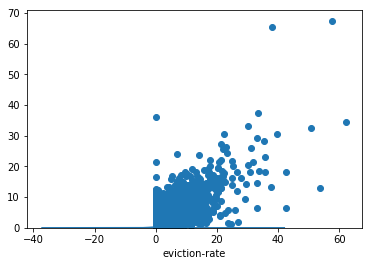

In [131]:
rfc = RandomForestRegressor(n_estimators=170,max_depth=39)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);

Training set score: 0.9229892524
Test set score: 0.5032477823
MAE: 2.2203552010124055
MSE: 11.796523838288392
RMSE: 3.434606795295262
Feature ranking:
1. feature 8 (lat) (0.146351)
2. feature 10 (TotalPropertyCrime) (0.115357)
3. feature 7 (lon) (0.110537)
4. feature 6 (pct-white) (0.093475)
5. feature 1 (pct-renter-occupied) (0.087225)
6. feature 0 (poverty-rate) (0.076325)
7. feature 2 (median-gross-rent) (0.066787)
8. feature 11 (TotalViolentCrime) (0.065436)
9. feature 5 (rent-burden) (0.062067)
10. feature 9 (unemployment_rate) (0.061097)
11. feature 3 (median-household-income) (0.057682)
12. feature 4 (median-property-value) (0.057661)


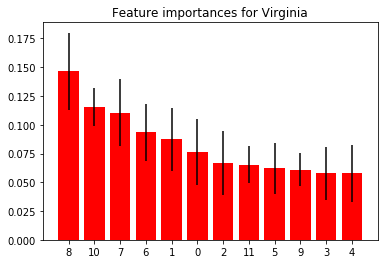

In [133]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Without using crime rate

In [134]:
df_clean2 = df2.dropna(axis=0, how='any')
df_clean2 = df_clean2[df_clean2['eviction-rate']<100]

df_county2=df_clean2[(df_clean2['year'] == 2000) | (df_clean2['year'] == 2001) | (df_clean2['year'] == 2002) |
                     (df_clean2['year'] == 2003) | (df_clean2['year'] == 2004)]

In [135]:
df_county2.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed', 'low-flag', 'lon', 'lat',
       'County', 'unemployment_rate'],
      dtype='object')

In [136]:
df_county2.head()

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,evictions,eviction-rate,eviction-filing-rate,imputed,subbed,low-flag,lon,lat,County,unemployment_rate
0,510010901001,2000,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,2.91,2.91,0,0,0,-75.3609,37.9635,Accomack County,3.0
1,510010901001,2001,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,1.0,0.98,0.98,0,0,0,-75.3609,37.9635,Accomack County,3.4
2,510010901001,2002,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,2.95,2.95,0,0,0,-75.3609,37.9635,Accomack County,4.2
3,510010901001,2003,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,3.0,2.96,2.96,0,0,0,-75.3609,37.9635,Accomack County,4.4
4,510010901001,2004,901.1,"Accomack County, Virginia",1055.92,3.53,19.79,572.18,32471.39,139906.77,...,0.0,0.00,0.00,0,0,0,-75.3609,37.9635,Accomack County,4.7


# Random Forest Analysis- Without crime rate (2000-2004)

In [140]:
df_county2.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed', 'low-flag', 'lon', 'lat',
       'County', 'unemployment_rate'],
      dtype='object')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


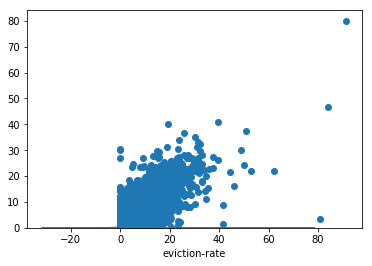

In [141]:
X = df_county2.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi', 'pct-multiple', 'pct-other','population','year',
                   'low-flag','County'],axis=1)
y = df_county2['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=10)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);


Training set score: 0.9134356759
Test set score: 0.5998969742
MAE: 2.52572978225011
MSE: 15.687685325713586
RMSE: 3.9607682746802526
Feature ranking:
1. feature 6 (pct-white) (0.239714)
2. feature 8 (lat) (0.155942)
3. feature 9 (unemployment_rate) (0.123573)
4. feature 7 (lon) (0.112486)
5. feature 1 (pct-renter-occupied) (0.084687)
6. feature 2 (median-gross-rent) (0.070416)
7. feature 0 (poverty-rate) (0.060273)
8. feature 3 (median-household-income) (0.053207)
9. feature 4 (median-property-value) (0.050586)
10. feature 5 (rent-burden) (0.049116)


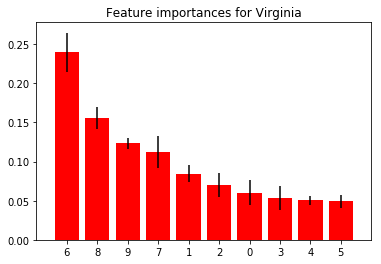

In [142]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [143]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(10, 200, 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(5,50, 2)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
pprint(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#create shuffelled cv
cv = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = cv, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_final_depth = rf_random.best_params_['max_depth']
rf_final_n_est = rf_random.best_params_['n_estimators']
print(rf_final_depth)
print(rf_final_n_est)

{'max_depth': [5,
               7,
               9,
               11,
               13,
               15,
               17,
               19,
               21,
               23,
               25,
               27,
               29,
               31,
               33,
               35,
               37,
               39,
               41,
               43,
               45,
               47,
               49],
 'n_estimators': [10,
                  20,
                  30,
                  40,
                  50,
                  60,
                  70,
                  80,
                  90,
                  100,
                  110,
                  120,
                  130,
                  140,
                  150,
                  160,
                  170,
                  180,
                  190]}
Fitting 20 folds for each of 100 candidates, totalling 2000 fits
[CV] n_estimators=160, max_depth=45 ..................................


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min


[CV] .................... n_estimators=30, max_depth=13, total=   5.2s
[CV] n_estimators=30, max_depth=13 ...................................
[CV] .................... n_estimators=30, max_depth=13, total=   5.3s
[CV] n_estimators=30, max_depth=13 ...................................
[CV] .................... n_estimators=30, max_depth=13, total=   5.3s
[CV] n_estimators=30, max_depth=13 ...................................
[CV] .................... n_estimators=30, max_depth=13, total=   5.3s
[CV] n_estimators=30, max_depth=13 ...................................
[CV] .................... n_estimators=30, max_depth=13, total=   5.2s
[CV] n_estimators=30, max_depth=13 ...................................
[CV] .................... n_estimators=30, max_depth=13, total=   5.2s
[CV] n_estimators=30, max_depth=13 ...................................
[CV] .................... n_estimators=30, max_depth=13, total=   5.2s
[CV] n_estimators=130, max_depth=33 ..................................
[CV] .

[CV] .................... n_estimators=30, max_depth=39, total=   6.9s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   6.9s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   6.9s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   7.1s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   6.7s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   6.7s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .................... n_estimators=30, max_depth=39, total=   6.9s
[CV] n_estimators=30, max_depth=39 ...................................
[CV] .

[CV] ................... n_estimators=100, max_depth=27, total=  23.1s
[CV] ................... n_estimators=100, max_depth=27, total=  23.2s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=  12.3s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=  12.6s
[CV] n_estimators=70, max_depth=13 ...................................


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.4min


[CV] .................... n_estimators=70, max_depth=13, total=  12.0s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=  12.1s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=  12.4s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=  12.3s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=  12.3s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=  12.4s
[CV] n_estimators=70, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=13, total=  12.4s
[CV] n_estimators=150, max_depth=49 ..................................
[CV] .

[CV] .................... n_estimators=60, max_depth=35, total=  13.8s
[CV] n_estimators=60, max_depth=35 ...................................
[CV] .................... n_estimators=60, max_depth=35, total=  14.0s
[CV] n_estimators=60, max_depth=35 ...................................
[CV] .................... n_estimators=60, max_depth=35, total=  14.0s
[CV] n_estimators=60, max_depth=35 ...................................
[CV] .................... n_estimators=60, max_depth=35, total=  14.0s
[CV] n_estimators=60, max_depth=35 ...................................
[CV] .................... n_estimators=60, max_depth=35, total=  13.9s
[CV] .................... n_estimators=60, max_depth=35, total=  13.6s
[CV] n_estimators=60, max_depth=35 ...................................
[CV] n_estimators=60, max_depth=35 ...................................
[CV] .................... n_estimators=60, max_depth=35, total=  13.6s
[CV] n_estimators=60, max_depth=35 ...................................
[CV] .

[CV] ................... n_estimators=150, max_depth=45, total=  34.7s
[CV] n_estimators=150, max_depth=45 ..................................
[CV] ................... n_estimators=150, max_depth=45, total=  34.4s
[CV] n_estimators=150, max_depth=45 ..................................
[CV] ................... n_estimators=150, max_depth=45, total=  34.2s
[CV] n_estimators=150, max_depth=45 ..................................
[CV] ................... n_estimators=150, max_depth=45, total=  34.8s
[CV] n_estimators=150, max_depth=45 ..................................
[CV] ................... n_estimators=150, max_depth=45, total=  34.6s
[CV] n_estimators=150, max_depth=45 ..................................
[CV] ................... n_estimators=150, max_depth=45, total=  34.1s
[CV] n_estimators=150, max_depth=45 ..................................
[CV] ................... n_estimators=150, max_depth=45, total=  34.6s
[CV] n_estimators=150, max_depth=45 ..................................
[CV] .

[CV] ................... n_estimators=140, max_depth=49, total=  32.4s
[CV] n_estimators=140, max_depth=49 ..................................
[CV] ................... n_estimators=140, max_depth=49, total=  31.7s
[CV] n_estimators=140, max_depth=49 ..................................
[CV] ................... n_estimators=140, max_depth=49, total=  32.3s
[CV] n_estimators=140, max_depth=49 ..................................
[CV] ................... n_estimators=140, max_depth=49, total=  32.8s
[CV] n_estimators=140, max_depth=49 ..................................
[CV] ................... n_estimators=140, max_depth=49, total=  32.7s
[CV] n_estimators=140, max_depth=49 ..................................
[CV] ................... n_estimators=140, max_depth=49, total=  31.8s
[CV] n_estimators=140, max_depth=49 ..................................
[CV] ................... n_estimators=140, max_depth=49, total=  32.1s
[CV] n_estimators=140, max_depth=49 ..................................
[CV] .

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 14.6min


[CV] .................... n_estimators=30, max_depth=25, total=   6.9s
[CV] n_estimators=30, max_depth=25 ...................................
[CV] .................... n_estimators=30, max_depth=25, total=   7.0s
[CV] n_estimators=30, max_depth=25 ...................................
[CV] .................... n_estimators=30, max_depth=25, total=   7.0s
[CV] n_estimators=30, max_depth=25 ...................................
[CV] ................... n_estimators=140, max_depth=49, total=  32.3s
[CV] n_estimators=170, max_depth=11 ..................................
[CV] ................... n_estimators=140, max_depth=49, total=  32.5s
[CV] ................... n_estimators=140, max_depth=49, total=  32.2s
[CV] n_estimators=170, max_depth=11 ..................................
[CV] n_estimators=170, max_depth=11 ..................................
[CV] ................... n_estimators=140, max_depth=49, total=  32.9s
[CV] n_estimators=170, max_depth=11 ..................................
[CV] .

[CV] .................... n_estimators=100, max_depth=5, total=   8.2s
[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total=   8.2s
[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total=   8.3s
[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total=   8.3s
[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total=   8.1s
[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total=   8.1s
[CV] n_estimators=50, max_depth=23 ...................................
[CV] .................... n_estimators=100, max_depth=5, total=   8.2s
[CV] n_estimators=50, max_depth=23 ...................................
[CV] .

[CV] ................... n_estimators=130, max_depth=47, total=  30.1s
[CV] ................... n_estimators=130, max_depth=47, total=  30.2s
[CV] n_estimators=130, max_depth=47 ..................................
[CV] n_estimators=130, max_depth=47 ..................................
[CV] ................... n_estimators=130, max_depth=47, total=  29.9s
[CV] n_estimators=130, max_depth=47 ..................................
[CV] ................... n_estimators=130, max_depth=47, total=  30.2s
[CV] n_estimators=130, max_depth=47 ..................................
[CV] ................... n_estimators=130, max_depth=47, total=  29.9s
[CV] n_estimators=130, max_depth=47 ..................................
[CV] ................... n_estimators=130, max_depth=47, total=  30.1s
[CV] n_estimators=130, max_depth=47 ..................................
[CV] ................... n_estimators=130, max_depth=47, total=  29.9s
[CV] n_estimators=130, max_depth=47 ..................................
[CV] .

[CV] ................... n_estimators=190, max_depth=17, total=  39.6s
[CV] n_estimators=140, max_depth=11 ..................................
[CV] ................... n_estimators=140, max_depth=11, total=  21.5s
[CV] n_estimators=140, max_depth=11 ..................................
[CV] ................... n_estimators=140, max_depth=11, total=  21.7s
[CV] n_estimators=140, max_depth=11 ..................................
[CV] ................... n_estimators=140, max_depth=11, total=  22.0s
[CV] n_estimators=140, max_depth=11 ..................................
[CV] ................... n_estimators=140, max_depth=11, total=  22.5s
[CV] n_estimators=140, max_depth=11 ..................................
[CV] ................... n_estimators=140, max_depth=11, total=  21.9s
[CV] n_estimators=140, max_depth=11 ..................................
[CV] ................... n_estimators=140, max_depth=11, total=  22.1s
[CV] n_estimators=140, max_depth=11 ..................................
[CV] .

[CV] .................... n_estimators=180, max_depth=9, total=  24.3s
[CV] n_estimators=180, max_depth=9 ...................................
[CV] .................... n_estimators=180, max_depth=9, total=  24.3s
[CV] n_estimators=180, max_depth=9 ...................................
[CV] .................... n_estimators=180, max_depth=9, total=  24.2s
[CV] n_estimators=180, max_depth=9 ...................................
[CV] .................... n_estimators=180, max_depth=9, total=  24.0s
[CV] n_estimators=180, max_depth=9 ...................................
[CV] .................... n_estimators=180, max_depth=9, total=  24.4s
[CV] n_estimators=180, max_depth=9 ...................................
[CV] .................... n_estimators=180, max_depth=9, total=  24.2s
[CV] n_estimators=180, max_depth=9 ...................................
[CV] .................... n_estimators=180, max_depth=9, total=  23.8s
[CV] n_estimators=180, max_depth=9 ...................................
[CV] .

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 26.7min


[CV] ................... n_estimators=190, max_depth=41, total=  43.0s
[CV] n_estimators=110, max_depth=23 ..................................
[CV] ................... n_estimators=190, max_depth=41, total=  43.9s
[CV] n_estimators=110, max_depth=23 ..................................
[CV] ................... n_estimators=190, max_depth=41, total=  43.6s
[CV] n_estimators=110, max_depth=23 ..................................
[CV] ................... n_estimators=190, max_depth=41, total=  43.4s
[CV] n_estimators=110, max_depth=23 ..................................
[CV] ................... n_estimators=110, max_depth=23, total=  25.0s
[CV] n_estimators=110, max_depth=23 ..................................
[CV] ................... n_estimators=110, max_depth=23, total=  24.9s
[CV] n_estimators=110, max_depth=23 ..................................
[CV] ................... n_estimators=110, max_depth=23, total=  25.5s
[CV] n_estimators=110, max_depth=23 ..................................
[CV] .

[CV] ................... n_estimators=150, max_depth=43, total=  34.2s
[CV] n_estimators=150, max_depth=43 ..................................
[CV] ................... n_estimators=150, max_depth=43, total=  34.7s
[CV] n_estimators=150, max_depth=43 ..................................
[CV] ................... n_estimators=150, max_depth=43, total=  33.8s
[CV] n_estimators=160, max_depth=11 ..................................
[CV] ................... n_estimators=150, max_depth=43, total=  34.0s
[CV] n_estimators=160, max_depth=11 ..................................
[CV] ................... n_estimators=150, max_depth=43, total=  34.9s
[CV] n_estimators=160, max_depth=11 ..................................
[CV] ................... n_estimators=150, max_depth=43, total=  35.0s
[CV] n_estimators=160, max_depth=11 ..................................
[CV] ................... n_estimators=160, max_depth=11, total=  25.4s
[CV] n_estimators=160, max_depth=11 ..................................
[CV] .

[CV] .................... n_estimators=70, max_depth=15, total=  13.2s
[CV] n_estimators=70, max_depth=15 ...................................
[CV] .................... n_estimators=70, max_depth=15, total=  13.5s
[CV] n_estimators=70, max_depth=15 ...................................
[CV] .................... n_estimators=70, max_depth=15, total=  13.9s
[CV] n_estimators=70, max_depth=15 ...................................
[CV] .................... n_estimators=70, max_depth=15, total=  13.6s
[CV] n_estimators=70, max_depth=15 ...................................
[CV] .................... n_estimators=70, max_depth=15, total=  13.6s
[CV] n_estimators=20, max_depth=9 ....................................
[CV] .................... n_estimators=70, max_depth=15, total=  13.8s
[CV] n_estimators=20, max_depth=9 ....................................
[CV] .................... n_estimators=70, max_depth=15, total=  13.4s
[CV] n_estimators=20, max_depth=9 ....................................
[CV] .

[CV] .................... n_estimators=60, max_depth=41, total=  13.9s
[CV] n_estimators=60, max_depth=41 ...................................
[CV] .................... n_estimators=60, max_depth=41, total=  14.2s
[CV] .................... n_estimators=60, max_depth=41, total=  13.7s
[CV] n_estimators=60, max_depth=41 ...................................
[CV] n_estimators=60, max_depth=41 ...................................
[CV] .................... n_estimators=60, max_depth=41, total=  13.9s
[CV] n_estimators=60, max_depth=41 ...................................
[CV] .................... n_estimators=60, max_depth=41, total=  13.7s
[CV] n_estimators=60, max_depth=41 ...................................
[CV] .................... n_estimators=60, max_depth=41, total=  13.9s
[CV] n_estimators=60, max_depth=41 ...................................
[CV] .................... n_estimators=60, max_depth=41, total=  13.8s
[CV] n_estimators=180, max_depth=17 ..................................
[CV] .

[CV] .................... n_estimators=40, max_depth=13, total=   7.1s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=70, max_depth=29, total=  15.9s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   7.1s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   7.0s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   7.0s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   7.1s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .................... n_estimators=40, max_depth=13, total=   7.3s
[CV] n_estimators=40, max_depth=13 ...................................
[CV] .

[CV] .................... n_estimators=150, max_depth=7, total=  16.5s
[CV] n_estimators=60, max_depth=21 ...................................
[CV] .................... n_estimators=150, max_depth=7, total=  16.6s
[CV] n_estimators=60, max_depth=21 ...................................
[CV] .................... n_estimators=60, max_depth=21, total=  13.4s
[CV] n_estimators=60, max_depth=21 ...................................
[CV] .................... n_estimators=60, max_depth=21, total=  13.7s
[CV] n_estimators=60, max_depth=21 ...................................
[CV] .................... n_estimators=60, max_depth=21, total=  14.0s
[CV] .................... n_estimators=60, max_depth=21, total=  13.5s
[CV] .................... n_estimators=60, max_depth=21, total=  13.4s
[CV] n_estimators=60, max_depth=21 ...................................
[CV] n_estimators=60, max_depth=21 ...................................
[CV] n_estimators=60, max_depth=21 ...................................
[CV] .

[CV] .................... n_estimators=40, max_depth=31, total=   9.2s
[CV] n_estimators=40, max_depth=31 ...................................
[CV] .................... n_estimators=40, max_depth=31, total=   9.3s
[CV] n_estimators=40, max_depth=31 ...................................
[CV] .................... n_estimators=40, max_depth=31, total=   9.1s
[CV] n_estimators=40, max_depth=31 ...................................
[CV] .................... n_estimators=40, max_depth=31, total=   9.5s
[CV] n_estimators=40, max_depth=31 ...................................
[CV] ................... n_estimators=180, max_depth=35, total=  41.5s
[CV] n_estimators=40, max_depth=31 ...................................
[CV] ................... n_estimators=180, max_depth=35, total=  41.4s
[CV] n_estimators=40, max_depth=31 ...................................
[CV] ................... n_estimators=180, max_depth=35, total=  41.8s
[CV] n_estimators=40, max_depth=31 ...................................
[CV] .

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 41.1min


[CV] .................... n_estimators=40, max_depth=31, total=   9.3s
[CV] n_estimators=30, max_depth=45 ...................................
[CV] .................... n_estimators=30, max_depth=45, total=   7.0s
[CV] n_estimators=30, max_depth=45 ...................................
[CV] .................... n_estimators=40, max_depth=31, total=   9.3s
[CV] n_estimators=30, max_depth=45 ...................................
[CV] .................... n_estimators=30, max_depth=45, total=   7.0s
[CV] n_estimators=30, max_depth=45 ...................................
[CV] .................... n_estimators=30, max_depth=45, total=   7.0s
[CV] .................... n_estimators=40, max_depth=31, total=   9.0s
[CV] n_estimators=30, max_depth=45 ...................................
[CV] .................... n_estimators=30, max_depth=45, total=   7.3s
[CV] n_estimators=30, max_depth=45 ...................................
[CV] n_estimators=30, max_depth=45 ...................................
[CV] .

[CV] .................... n_estimators=60, max_depth=47, total=  13.9s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] .................... n_estimators=60, max_depth=47, total=  13.6s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] .................... n_estimators=60, max_depth=47, total=  13.8s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] .................... n_estimators=60, max_depth=47, total=  14.0s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] .................... n_estimators=60, max_depth=47, total=  14.2s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  27.0s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  27.0s
[CV] n_estimators=130, max_depth=17 ..................................
[CV] .

[CV] ..................... n_estimators=10, max_depth=7, total=   1.2s
[CV] n_estimators=150, max_depth=33 ..................................
[CV] ..................... n_estimators=10, max_depth=7, total=   1.0s
[CV] ..................... n_estimators=10, max_depth=7, total=   1.1s
[CV] n_estimators=150, max_depth=33 ..................................
[CV] n_estimators=150, max_depth=33 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  27.4s
[CV] n_estimators=150, max_depth=33 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  27.4s
[CV] n_estimators=150, max_depth=33 ..................................
[CV] ................... n_estimators=130, max_depth=17, total=  27.3s
[CV] ................... n_estimators=130, max_depth=17, total=  27.2s
[CV] n_estimators=150, max_depth=33 ..................................
[CV] n_estimators=150, max_depth=33 ..................................
[CV] .

[CV] .................... n_estimators=190, max_depth=9, total=  25.4s
[CV] n_estimators=190, max_depth=9 ...................................
[CV] .................... n_estimators=190, max_depth=9, total=  25.6s
[CV] n_estimators=120, max_depth=27 ..................................
[CV] .................... n_estimators=190, max_depth=9, total=  25.4s
[CV] n_estimators=120, max_depth=27 ..................................
[CV] .................... n_estimators=190, max_depth=9, total=  25.8s
[CV] n_estimators=120, max_depth=27 ..................................
[CV] .................... n_estimators=190, max_depth=9, total=  25.3s
[CV] n_estimators=120, max_depth=27 ..................................
[CV] .................... n_estimators=190, max_depth=9, total=  25.7s
[CV] n_estimators=120, max_depth=27 ..................................
[CV] .................... n_estimators=190, max_depth=9, total=  25.4s
[CV] n_estimators=120, max_depth=27 ..................................
[CV] .

[CV] ................... n_estimators=180, max_depth=13, total=  31.9s
[CV] n_estimators=180, max_depth=13 ..................................
[CV] ................... n_estimators=180, max_depth=13, total=  32.0s
[CV] n_estimators=180, max_depth=13 ..................................
[CV] ................... n_estimators=180, max_depth=13, total=  31.9s
[CV] n_estimators=180, max_depth=13 ..................................
[CV] ................... n_estimators=180, max_depth=13, total=  31.7s
[CV] n_estimators=30, max_depth=35 ...................................
[CV] ................... n_estimators=180, max_depth=13, total=  31.6s
[CV] n_estimators=30, max_depth=35 ...................................
[CV] ................... n_estimators=180, max_depth=13, total=  32.4s
[CV] n_estimators=30, max_depth=35 ...................................
[CV] ................... n_estimators=180, max_depth=13, total=  31.6s
[CV] n_estimators=30, max_depth=35 ...................................
[CV] .

[CV] ................... n_estimators=180, max_depth=33, total=  41.4s
[CV] n_estimators=180, max_depth=33 ..................................
[CV] ................... n_estimators=180, max_depth=33, total=  41.4s
[CV] n_estimators=180, max_depth=33 ..................................
[CV] ................... n_estimators=180, max_depth=33, total=  41.6s
[CV] n_estimators=180, max_depth=33 ..................................
[CV] ................... n_estimators=180, max_depth=33, total=  41.3s
[CV] n_estimators=180, max_depth=33 ..................................
[CV] ................... n_estimators=180, max_depth=33, total=  41.6s
[CV] n_estimators=180, max_depth=33 ..................................
[CV] ................... n_estimators=180, max_depth=33, total=  41.6s
[CV] n_estimators=100, max_depth=43 ..................................
[CV] ................... n_estimators=180, max_depth=33, total=  40.9s
[CV] n_estimators=100, max_depth=43 ..................................
[CV] .

[CV] ................... n_estimators=190, max_depth=47, total=  43.8s
[CV] n_estimators=190, max_depth=47 ..................................
[CV] ................... n_estimators=190, max_depth=47, total=  43.5s
[CV] n_estimators=190, max_depth=47 ..................................
[CV] ................... n_estimators=190, max_depth=47, total=  44.5s
[CV] n_estimators=190, max_depth=47 ..................................
[CV] ................... n_estimators=190, max_depth=47, total=  44.1s
[CV] n_estimators=190, max_depth=47 ..................................
[CV] ................... n_estimators=190, max_depth=47, total=  43.2s
[CV] n_estimators=190, max_depth=47 ..................................
[CV] ................... n_estimators=190, max_depth=47, total=  43.8s
[CV] n_estimators=190, max_depth=47 ..................................
[CV] ................... n_estimators=190, max_depth=47, total=  44.0s
[CV] n_estimators=190, max_depth=47 ..................................
[CV] .

[CV] ................... n_estimators=190, max_depth=15, total=  37.8s
[CV] n_estimators=50, max_depth=9 ....................................
[CV] ..................... n_estimators=50, max_depth=9, total=   6.4s
[CV] n_estimators=50, max_depth=9 ....................................
[CV] ..................... n_estimators=50, max_depth=9, total=   6.7s
[CV] n_estimators=50, max_depth=9 ....................................
[CV] ..................... n_estimators=50, max_depth=9, total=   6.6s
[CV] n_estimators=50, max_depth=9 ....................................
[CV] ..................... n_estimators=50, max_depth=9, total=   6.5s
[CV] n_estimators=50, max_depth=9 ....................................
[CV] ..................... n_estimators=50, max_depth=9, total=   6.7s
[CV] n_estimators=50, max_depth=9 ....................................
[CV] ..................... n_estimators=50, max_depth=9, total=   6.9s
[CV] n_estimators=50, max_depth=9 ....................................
[CV] .

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 62.2min


[CV] .................... n_estimators=50, max_depth=45, total=  11.4s
[CV] n_estimators=50, max_depth=45 ...................................
[CV] .................... n_estimators=50, max_depth=45, total=  11.5s
[CV] n_estimators=50, max_depth=45 ...................................
[CV] ................... n_estimators=140, max_depth=21, total=  31.7s
[CV] n_estimators=50, max_depth=45 ...................................
[CV] ................... n_estimators=140, max_depth=21, total=  31.0s
[CV] n_estimators=50, max_depth=45 ...................................
[CV] ................... n_estimators=140, max_depth=21, total=  31.6s
[CV] n_estimators=50, max_depth=45 ...................................
[CV] ................... n_estimators=140, max_depth=21, total=  32.1s
[CV] n_estimators=50, max_depth=45 ...................................
[CV] .................... n_estimators=50, max_depth=45, total=  11.8s
[CV] n_estimators=50, max_depth=45 ...................................
[CV] .

[CV] ................... n_estimators=110, max_depth=17, total=  23.6s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=  22.8s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=  22.6s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=  23.0s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=  23.3s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=  23.0s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] ................... n_estimators=110, max_depth=17, total=  23.2s
[CV] n_estimators=110, max_depth=17 ..................................
[CV] .

[CV] ..................... n_estimators=40, max_depth=7, total=   4.4s
[CV] n_estimators=90, max_depth=9 ....................................
[CV] ..................... n_estimators=40, max_depth=7, total=   4.4s
[CV] n_estimators=90, max_depth=9 ....................................
[CV] ..................... n_estimators=90, max_depth=9, total=  11.7s
[CV] n_estimators=90, max_depth=9 ....................................
[CV] ..................... n_estimators=90, max_depth=9, total=  12.0s
[CV] n_estimators=90, max_depth=9 ....................................
[CV] ..................... n_estimators=90, max_depth=9, total=  12.0s
[CV] n_estimators=90, max_depth=9 ....................................
[CV] ..................... n_estimators=90, max_depth=9, total=  12.3s
[CV] n_estimators=90, max_depth=9 ....................................
[CV] ..................... n_estimators=90, max_depth=9, total=  11.9s
[CV] n_estimators=90, max_depth=9 ....................................
[CV] .

[CV] ................... n_estimators=180, max_depth=29, total=  42.5s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] .................... n_estimators=30, max_depth=17, total=   6.3s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] .................... n_estimators=30, max_depth=17, total=   6.3s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] .................... n_estimators=30, max_depth=17, total=   6.1s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] .................... n_estimators=30, max_depth=17, total=   6.2s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] .................... n_estimators=30, max_depth=17, total=   6.5s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] .................... n_estimators=30, max_depth=17, total=   6.3s
[CV] n_estimators=30, max_depth=17 ...................................
[CV] .

[CV] .................... n_estimators=10, max_depth=11, total=   1.6s
[CV] .................... n_estimators=10, max_depth=11, total=   1.7s
[CV] n_estimators=50, max_depth=19 ...................................
[CV] n_estimators=50, max_depth=19 ...................................
[CV] .................... n_estimators=70, max_depth=49, total=  15.8s
[CV] n_estimators=50, max_depth=19 ...................................
[CV] .................... n_estimators=70, max_depth=49, total=  16.5s
[CV] n_estimators=50, max_depth=19 ...................................
[CV] .................... n_estimators=70, max_depth=49, total=  16.4s
[CV] n_estimators=50, max_depth=19 ...................................
[CV] .................... n_estimators=70, max_depth=49, total=  16.0s
[CV] n_estimators=50, max_depth=19 ...................................
[CV] .................... n_estimators=50, max_depth=19, total=  10.6s
[CV] n_estimators=50, max_depth=19 ...................................
[CV] .

[CV] .................... n_estimators=180, max_depth=5, total=  14.8s
[CV] n_estimators=100, max_depth=11 ..................................
[CV] .................... n_estimators=180, max_depth=5, total=  14.7s
[CV] n_estimators=100, max_depth=11 ..................................
[CV] .................... n_estimators=180, max_depth=5, total=  15.1s
[CV] n_estimators=100, max_depth=11 ..................................
[CV] .................... n_estimators=180, max_depth=5, total=  14.9s
[CV] n_estimators=100, max_depth=11 ..................................
[CV] .................... n_estimators=180, max_depth=5, total=  15.0s
[CV] n_estimators=100, max_depth=11 ..................................
[CV] .................... n_estimators=180, max_depth=5, total=  14.9s
[CV] n_estimators=100, max_depth=11 ..................................
[CV] .................... n_estimators=180, max_depth=5, total=  15.0s
[CV] n_estimators=100, max_depth=11 ..................................
[CV] .

[CV] .................... n_estimators=70, max_depth=47, total=  16.2s
[CV] n_estimators=70, max_depth=47 ...................................
[CV] .................... n_estimators=70, max_depth=47, total=  16.1s
[CV] n_estimators=70, max_depth=47 ...................................
[CV] .................... n_estimators=70, max_depth=47, total=  16.2s
[CV] n_estimators=130, max_depth=7 ...................................
[CV] .................... n_estimators=70, max_depth=47, total=  16.2s
[CV] n_estimators=130, max_depth=7 ...................................
[CV] .................... n_estimators=70, max_depth=47, total=  16.1s
[CV] n_estimators=130, max_depth=7 ...................................
[CV] .................... n_estimators=70, max_depth=47, total=  16.3s
[CV] n_estimators=130, max_depth=7 ...................................
[CV] .................... n_estimators=70, max_depth=47, total=  16.3s
[CV] n_estimators=130, max_depth=7 ...................................
[CV] .

[CV] ................... n_estimators=150, max_depth=35, total=  34.7s
[CV] n_estimators=150, max_depth=35 ..................................
[CV] ................... n_estimators=150, max_depth=35, total=  33.6s
[CV] ................... n_estimators=150, max_depth=35, total=  34.8s
[CV] n_estimators=150, max_depth=35 ..................................
[CV] n_estimators=150, max_depth=35 ..................................
[CV] ................... n_estimators=150, max_depth=35, total=  35.0s
[CV] n_estimators=150, max_depth=35 ..................................
[CV] ................... n_estimators=150, max_depth=35, total=  34.3s
[CV] n_estimators=30, max_depth=23 ...................................
[CV] ................... n_estimators=150, max_depth=35, total=  35.0s
[CV] n_estimators=30, max_depth=23 ...................................
[CV] ................... n_estimators=150, max_depth=35, total=  34.4s
[CV] n_estimators=30, max_depth=23 ...................................
[CV] .

[CV] ................... n_estimators=190, max_depth=27, total=  43.9s
[CV] ................... n_estimators=190, max_depth=27, total=  44.2s
[CV] n_estimators=190, max_depth=27 ..................................
[CV] n_estimators=190, max_depth=27 ..................................
[CV] ................... n_estimators=190, max_depth=27, total=  43.3s
[CV] n_estimators=190, max_depth=27 ..................................
[CV] ................... n_estimators=190, max_depth=27, total=  43.2s
[CV] n_estimators=190, max_depth=27 ..................................
[CV] ................... n_estimators=190, max_depth=27, total=  43.8s
[CV] n_estimators=190, max_depth=27 ..................................
[CV] ................... n_estimators=190, max_depth=27, total=  44.2s
[CV] n_estimators=190, max_depth=27 ..................................
[CV] ................... n_estimators=190, max_depth=27, total=  43.7s
[CV] n_estimators=110, max_depth=49 ..................................
[CV] .

[CV] n_estimators=130, max_depth=41 ..................................
[CV] n_estimators=130, max_depth=41 ..................................
[CV] ................... n_estimators=130, max_depth=41, total=  30.7s
[CV] n_estimators=130, max_depth=41 ..................................
[CV] ................... n_estimators=130, max_depth=41, total=  30.3s
[CV] n_estimators=130, max_depth=41 ..................................
[CV] ................... n_estimators=130, max_depth=41, total=  30.0s
[CV] n_estimators=130, max_depth=41 ..................................
[CV] ................... n_estimators=130, max_depth=41, total=  30.9s
[CV] n_estimators=130, max_depth=41 ..................................


[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 83.6min


[CV] ................... n_estimators=130, max_depth=41, total=  30.5s
[CV] n_estimators=130, max_depth=41 ..................................
[CV] ................... n_estimators=130, max_depth=41, total=  30.3s
[CV] n_estimators=130, max_depth=41 ..................................
[CV] ................... n_estimators=130, max_depth=41, total=  30.2s
[CV] n_estimators=130, max_depth=41 ..................................
[CV] ................... n_estimators=130, max_depth=41, total=  30.3s
[CV] ................... n_estimators=130, max_depth=41, total=  30.4s
[CV] n_estimators=70, max_depth=33 ...................................
[CV] n_estimators=70, max_depth=33 ...................................
[CV] ................... n_estimators=130, max_depth=41, total=  29.6s
[CV] n_estimators=70, max_depth=33 ...................................
[CV] ................... n_estimators=130, max_depth=41, total=  30.6s
[CV] n_estimators=70, max_depth=33 ...................................
[CV] .

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 84.6min finished


17
190


/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


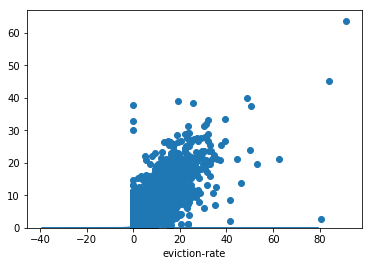

In [144]:
rfc = RandomForestRegressor(n_estimators=190,max_depth=17)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);

Training set score: 0.8966759686
Test set score: 0.6136111316
MAE: 2.4633722622583005
MSE: 15.149965360108553
RMSE: 3.8922956414060526
Feature ranking:
1. feature 6 (pct-white) (0.248415)
2. feature 8 (lat) (0.165724)
3. feature 9 (unemployment_rate) (0.108265)
4. feature 7 (lon) (0.104155)
5. feature 1 (pct-renter-occupied) (0.082368)
6. feature 2 (median-gross-rent) (0.074687)
7. feature 0 (poverty-rate) (0.063552)
8. feature 4 (median-property-value) (0.058086)
9. feature 5 (rent-burden) (0.050295)
10. feature 3 (median-household-income) (0.044453)


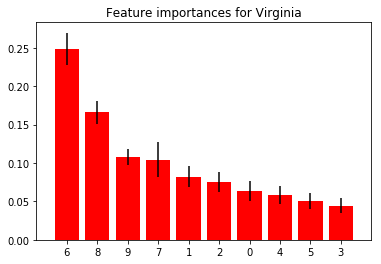

In [145]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# use no crime rate results to exam  year 2005-2009

In [146]:
df_county3=df_clean2[(df_clean2['year'] == 2005) | (df_clean2['year'] == 2006) | (df_clean2['year'] == 2007) |
                     (df_clean2['year'] == 2008) | (df_clean2['year'] == 2009)]

In [147]:
df_county3.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed', 'low-flag', 'lon', 'lat',
       'County', 'unemployment_rate'],
      dtype='object')

In [148]:
df_county3.head()

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,evictions,eviction-rate,eviction-filing-rate,imputed,subbed,low-flag,lon,lat,County,unemployment_rate
5,510010901001,2005,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.5,35013.59,223919.4,...,0.0,0.00,0.00,0,0,0,-75.3609,37.9635,Accomack County,4.7
6,510010901001,2006,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.5,35013.59,223919.4,...,4.0,4.02,4.02,0,0,0,-75.3609,37.9635,Accomack County,4.3
7,510010901001,2007,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.5,35013.59,223919.4,...,3.0,3.04,4.05,0,0,0,-75.3609,37.9635,Accomack County,4.1
8,510010901001,2008,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.5,35013.59,223919.4,...,2.0,2.04,2.04,0,0,0,-75.3609,37.9635,Accomack County,5.0
9,510010901001,2009,901.1,"Accomack County, Virginia",1191.36,2.95,18.07,584.5,35013.59,223919.4,...,2.0,2.05,2.05,0,0,0,-75.3609,37.9635,Accomack County,6.5


In [149]:
df_county3.shape

(20028, 31)

In [150]:
X3 = df_county3.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi', 'pct-multiple', 'pct-other','population','year',
                   'low-flag','County'],axis=1)
y3 = df_county3['eviction-rate']

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


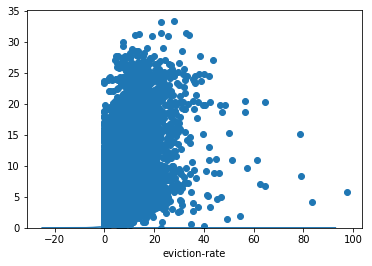

In [151]:
predictions_2005_2009 = rfc.predict(X3)

plt.scatter(y3,predictions_2005_2009)

sns.distplot((y3-predictions_2005_2009),bins=50);

In [153]:
print("year 2005-2009 set score: %.10f" % rfc.score(X3, y3))

print('MAE:', metrics.mean_absolute_error(y3, predictions_2005_2009))
print('MSE:', metrics.mean_squared_error(y3, predictions_2005_2009))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3, predictions_2005_2009)))

importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]



year 2005-2009 set score: 0.2197935040
MAE: 3.3987210188153036
MSE: 25.165783616690778
RMSE: 5.016550968214195


# Use KNN

In [154]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [155]:
X = df_county2.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi', 'pct-multiple', 'pct-other','population','year',
                   'low-flag','County'],axis=1)
y = df_county2['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [156]:
# n_neighbors = [int(x) for x in np.arange(5, 150, 5)]

# # Create the random grid
# random_grid = {'n_neighbors': n_neighbors}

# pprint(random_grid)
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# #create shuffelled cv
# cv = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
# knr = KNeighborsRegressor()
# rf_random = RandomizedSearchCV(estimator = knr, 
#                                param_distributions = random_grid, 
#                                n_iter = 100, 
#                                cv = cv, 
#                                verbose=2, 
#                                random_state=42, 
#                                n_jobs = -1)
# rf_random.fit(X_train, y_train)
# rf_final_n_neighbors = rf_random.best_params_['n_neighbors']
# print(rf_final_n_neighbors)


{'n_neighbors': [5,
                 10,
                 15,
                 20,
                 25,
                 30,
                 35,
                 40,
                 45,
                 50,
                 55,
                 60,
                 65,
                 70,
                 75,
                 80,
                 85,
                 90,
                 95,
                 100,
                 105,
                 110,
                 115,
                 120,
                 125,
                 130,
                 135,
                 140,
                 145]}


ValueError: The total space of parameters 29 is smaller than n_iter=100. For exhaustive searches, use GridSearchCV.

In [162]:
est = KNeighborsRegressor()
gs = model_selection.GridSearchCV(
    est,
    {"n_neighbors": range(5,200,5)},
    cv=5,  # 5-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_mean_squared_error'
)
gs.fit(X_train, y_train)
print(gs.best_params_)


{'n_neighbors': 5}


In [163]:
est = KNeighborsRegressor()
gs = model_selection.GridSearchCV(
    est,
    {"n_neighbors": range(1,20)},
    cv=5,  # 5-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_mean_squared_error'
)
gs.fit(X_train, y_train)
print(gs.best_params_)


{'n_neighbors': 2}


/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


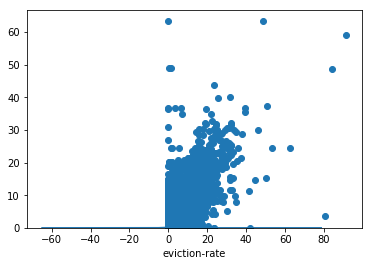

In [164]:
predictions= gs.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);

In [165]:
print("Training set score: %.10f" % gs.score(X_train, y_train))
print("Test set score: %.10f" % gs.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: -5.5444073116
Test set score: -21.0570976699
MAE: 2.8125902969084784
MSE: 21.057097669880623
RMSE: 4.588801332579198


In [166]:
# above results are weird...
# let's direct fit

In [168]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


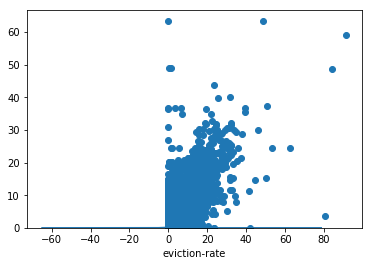

In [170]:
predictions = knr.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);

In [171]:
print("Training set score: %.10f" % knr.score(X_train, y_train))
print("Test set score: %.10f" % knr.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.8506507916
Test set score: 0.4629540103
MAE: 2.8125902969084784
MSE: 21.057097669880623
RMSE: 4.588801332579198
